Below are plots of Bellevue's public school enrollment.
Data is from from the WA OPSI portal.

In [1]:
import glob
import pandas as pd
pd.set_option('display.max_columns', None) # set the max columns to display to none

# 2022-23 For Bellevue only. One school at a time. *Sigh*
# https://washingtonstatereportcard.ospi.k12.wa.us/ReportCard/ViewSchoolOrDistrict/101387
def bellevue2023():
    def gen():
        for filename in glob.glob("OSPI_publicschools/2022_Bellevue/*.csv"):
            df = pd.read_csv(filename)
            df = df.rename(columns={'Organization Name':'SchoolName', 'School Year':"Year", 'Gradelevel':'GradeLevel', 'Number Of Students':'All Students' })
            df['DistrictName'] = 'Bellevue'
            #print(df['School Name'].unique(), filename)
            yield df
    return pd.concat(gen())

# Public school data: https://www.k12.wa.us/data-reporting/data-portal
year2Pubdata = {
  2014: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2014-15_School_Year.csv'),
  2015: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2015-16_School_Year.csv'),
  2016: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2016-17_School_Year.csv'),
  2017: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2017-18_School_Year.csv'),
  2018: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2018-19_School_Year.csv'),
  2019: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2019-20_School_Year.csv'),
  2020: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2020-21_School_Year.csv'),
  2021: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2021-22_School_Year.csv'),
  # 2022-23 is Bellevue only here. Comment out if examining other districts
  2022: bellevue2023()
}
regionSubstring = "ellevue"  # Bellevue et al.  Replace with other districts and re-run if you wish

/tmp/ipykernel_1822667/3933176302.py:19: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  2014: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2014-15_School_Year.csv'),
/tmp/ipykernel_1822667/3933176302.py:20: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  2015: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2015-16_School_Year.csv'),
/tmp/ipykernel_1822667/3933176302.py:21: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  2016: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2016-17_School_Year.csv'),
/tmp/ipykernel_1822667/3933176302.py:22: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  2017: pd.read_csv('OSPI_publicschools/Report_Card_Enrollment_2017-18_School_Year.csv'),
/tmp/ipykernel_1822667/3933176302.py:23: DtypeWarning: Columns (11) have

In [2]:
# Normalize data - just want ['Year', 'School Name', "Region", "Grade", "Total"]
# This format is common the this collections of workbooks
years = list(year2Pubdata.keys())
datacols = ['Year', 'School Name', "Region", "Grade", "Total"]
grades = ['K', 'P'] + list(range(1,13))    # NB. range in Python is exclusive of last values\
gradeMap = {  # For standardize grade categories
 'Pre-Kindergarten': 'P',
 'Kindergarten': 'K',
 'Half-day Kindergarten': 'K', #?
 '1st Grade':'1',
 '2nd Grade':'2',
 '3rd Grade':'3',
 '4th Grade':'4',
 '5th Grade':'5',
 '6th Grade':'6',
 '7th Grade':'7',
 '8th Grade':'8',
 '9th Grade':'9',
 '10th Grade':'10',
 '11th Grade':'11',
 '12th Grade':'12',
}

# Cleanup each CSV file
def mapData(year, df):
  df = df.copy()
  df = df.rename(columns={'SchoolName':'School Name', 'DistrictName' : 'Region', 'All Students': 'Total'})
  df['Year'] = year
  df = df[df['GradeLevel']!='AllGrades']
  df['Grade'] = df['GradeLevel'].replace(gradeMap)
  df = df[df['School Name']!='State Total']
  df = df[df['School Name']!='District Total']    
  return df[datacols + list(set(df.columns)-set(datacols))]

year2PubdataNormalized = { year:mapData(year, df) for (year, df) in year2Pubdata.items() }
pubdataNormalized = pd.concat(year2PubdataNormalized.values()).reindex()

In [3]:
# Santity checks
print(pubdataNormalized.columns)
print("Grade", sorted(pubdataNormalized["Grade"].unique()))
print("Year", sorted(pubdataNormalized["Year"].unique()))
dAll = pubdataNormalized.copy()
print("Total WA public enrollment by year")
display(dAll.groupby("Year")["Total"].sum())

Index(['Year', 'School Name', 'Region', 'Grade', 'Total', 'Military Parent',
       'Non Military Parent', 'Female', 'Asian', 'SchoolYear',
       'Students without Disabilities', 'White', 'Non-Low Income',
       'Non-Homeless', 'Low-Income', 'DataAsOf', 'SchoolCode', 'Non Migrant',
       'Two or More Races', 'Non Mobile', 'DistrictOrganizationId',
       'ESDOrganizationID', 'GradeLevel', 'Section 504', 'non_foster_care',
       'American Indian/ Alaskan Native', 'Non-Highly Capable', 'foster_care',
       'Male', 'Students with Disabilities',
       'Native Hawaiian/ Other Pacific Islander', 'Homeless',
       'Non-English Language Learners', 'County', 'CurrentSchoolType',
       'Black/ African American', 'ESDName', 'English Language Learners',
       'OrganizationLevel', 'Non Section 504', 'SchoolOrganizationid',
       'Hispanic/ Latino of any race(s)', 'Mobile', 'DistrictCode', 'Migrant',
       'Gender X', 'Highly Capable', 'Foster_Care', 'Non_Foster_Care',
       'ESDOrganiza

Year
2014    1129679
2015    1146387
2016    1165249
2017    1179552
2018    1188916
2019    1196833
2020    1145043
2021    1093807
2022      17420
Name: Total, dtype: int64

In [4]:
# Trim data to a particular school district
dAllRegionOfInterest = dAll[dAll["Region"].astype(str).str.contains(regionSubstring)]

print(f'Regions considered:')
display(dAllRegionOfInterest["Region"].unique())

print(f'\nSchools reporting: {dAllRegionOfInterest["School Name"].unique().size}.')
display(list(dAllRegionOfInterest["School Name"].unique()))
zeroReportedAnyYear = dAllRegionOfInterest.groupby("School Name")["Total"].sum()
zeroReportedAnyYear = zeroReportedAnyYear[zeroReportedAnyYear==0]

print(f'\nSchools reporting 0 enrollment (any year): {zeroReportedAnyYear.size}')
display(zeroReportedAnyYear)

Regions considered:


array(['Bellevue School District', 'Bellevue'], dtype=object)


Schools reporting: 31.


['Ardmore Elementary School',
 'Bellevue Big Picture School',
 'Bellevue High School',
 'Bennett Elementary School',
 'Central Educational Services',
 'Cherry Crest Elementary School',
 'Chinook Middle School',
 'Clyde Hill Elementary',
 'Eastgate Elementary School',
 'Enatai Elementary School',
 'Highland Middle School',
 'Interlake Senior High School',
 'International School',
 'Jing Mei Elementary School',
 'Lake Hills Elementary',
 'Medina Elementary School',
 'Newport Heights Elementary',
 'Newport Senior High School',
 'Odle Middle School',
 'Phantom Lake Elementary',
 'Puesta del Sol Elementary School',
 'Sammamish Senior High',
 'Sherwood Forest Elementary',
 'Somerset Elementary School',
 'Spiritridge Elementary School',
 'Stevenson Elementary',
 'Tillicum Middle School',
 'Tyee Middle School',
 'Woodridge Elementary',
 'Career Education Options Reengagement Program',
 'Wilburton Elementary School']


Schools reporting 0 enrollment (any year): 0


Series([], Name: Total, dtype: int64)

YEAR > 2014 -------------------------


<Figure size 1600x500 with 0 Axes>

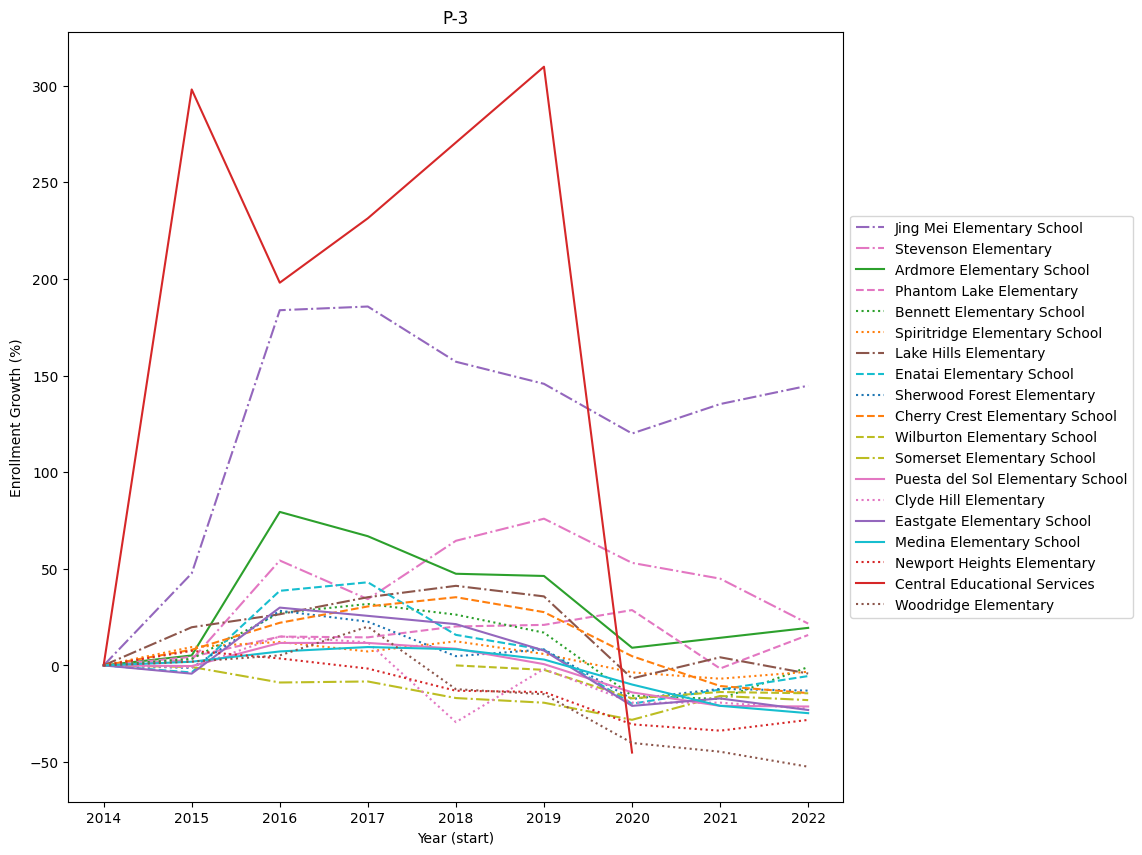

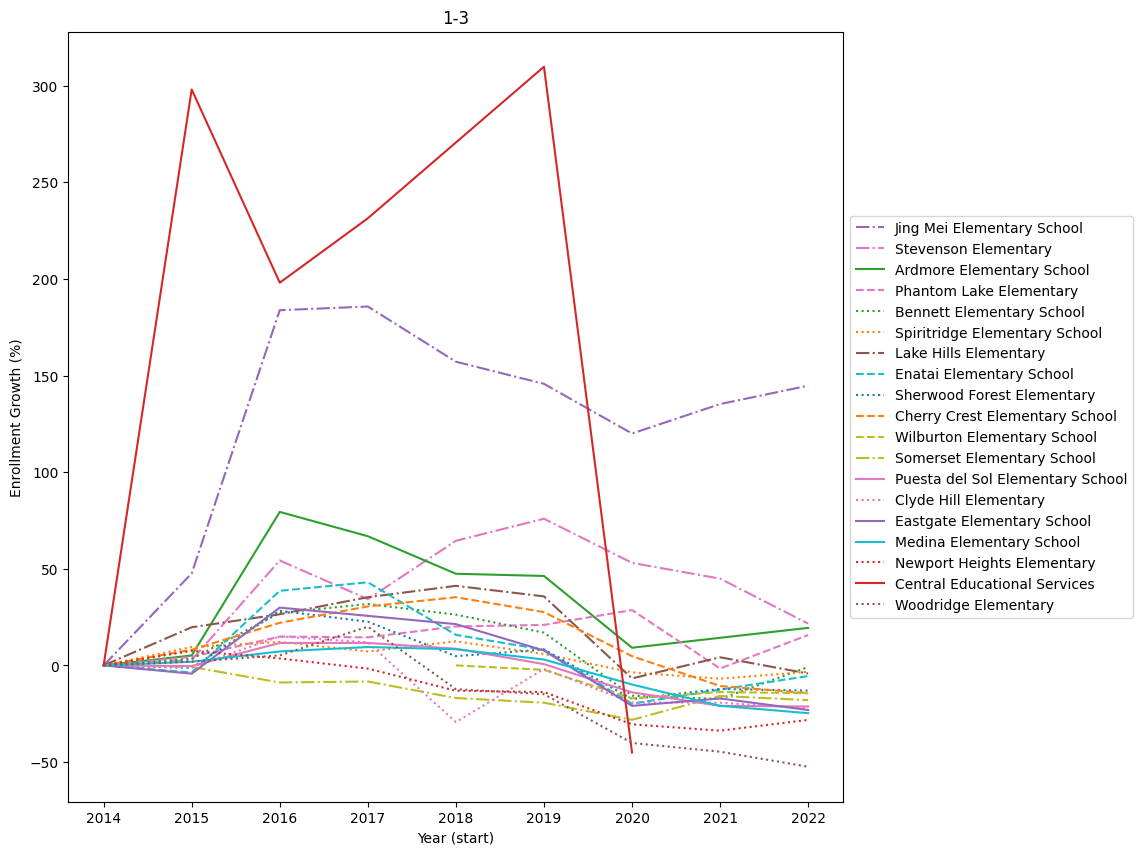

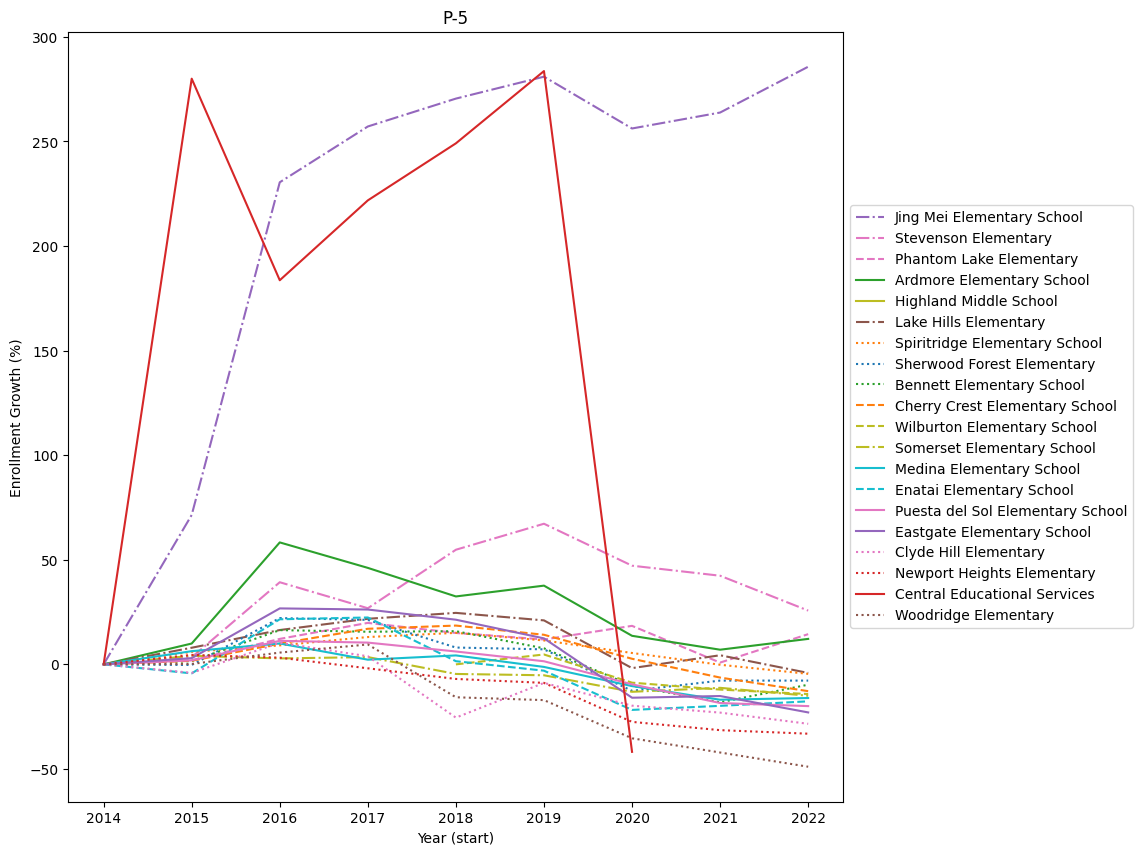

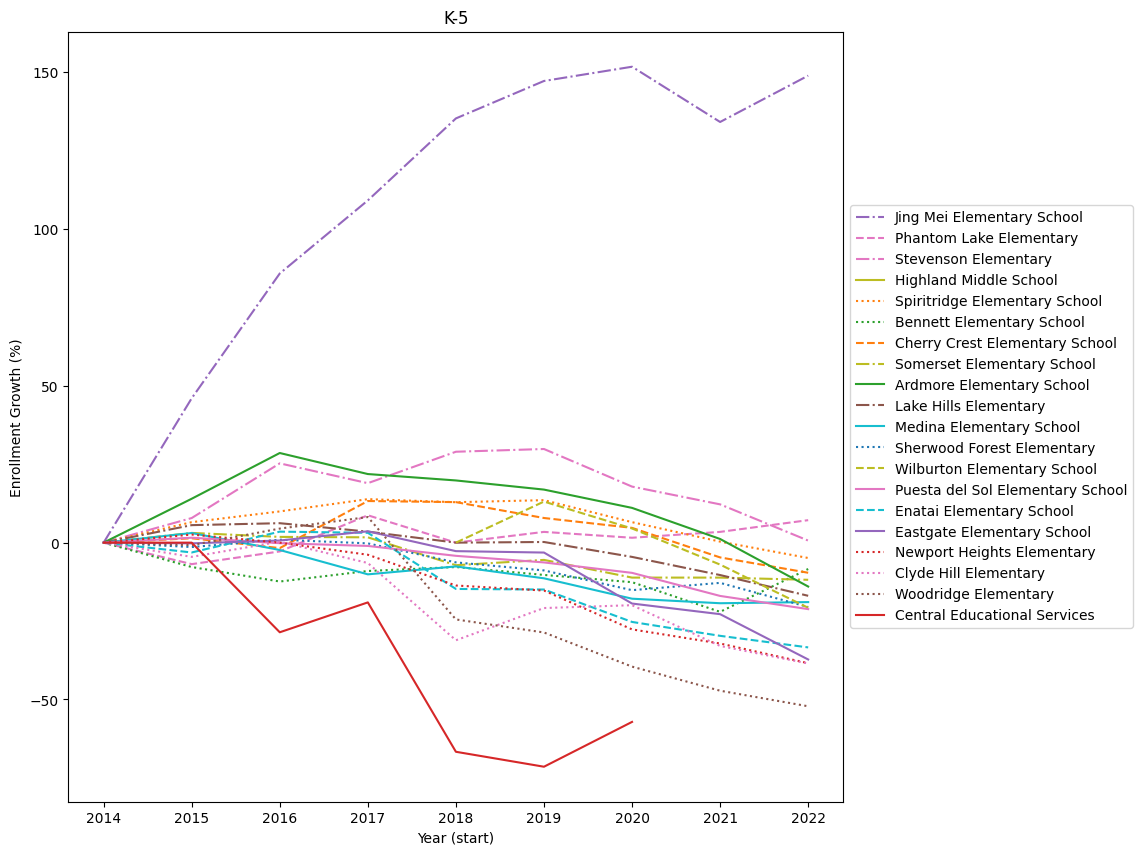

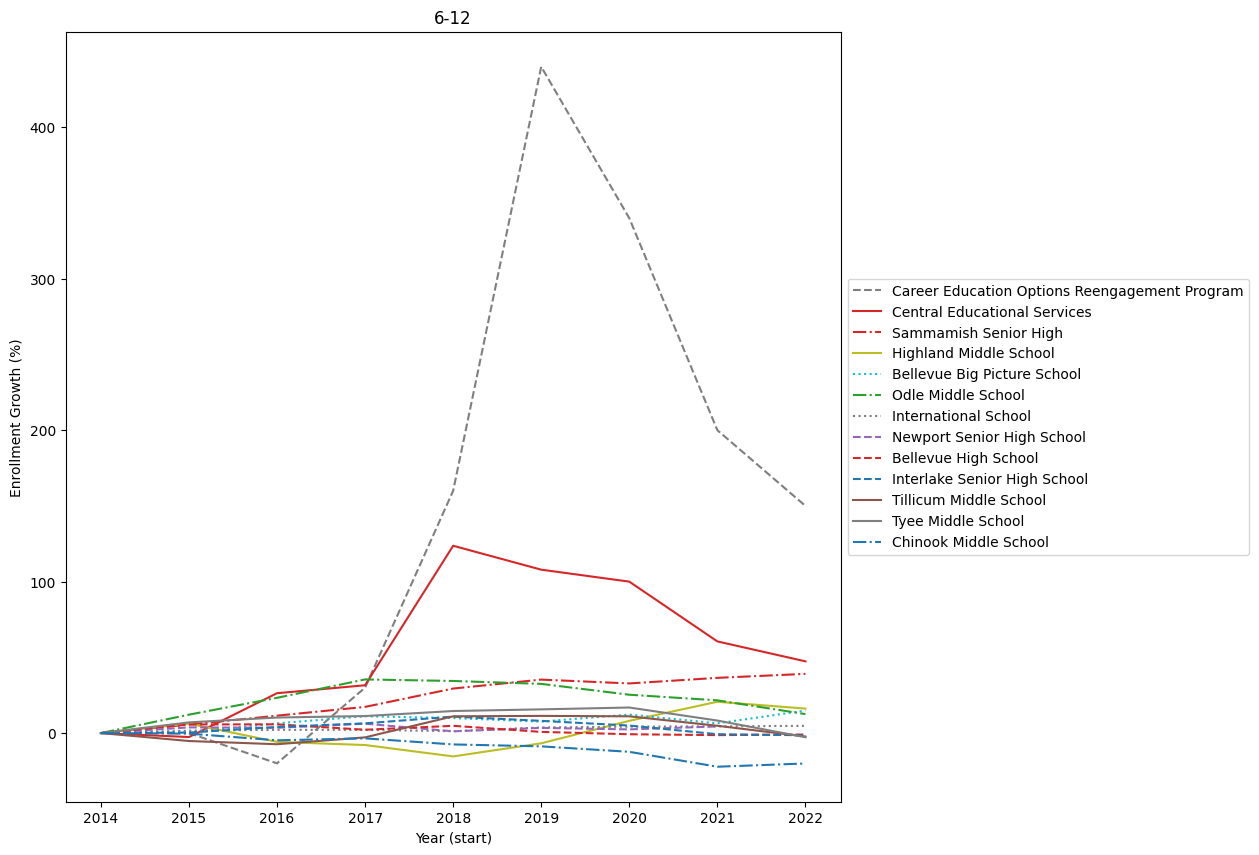

YEAR > 2019 -------------------------


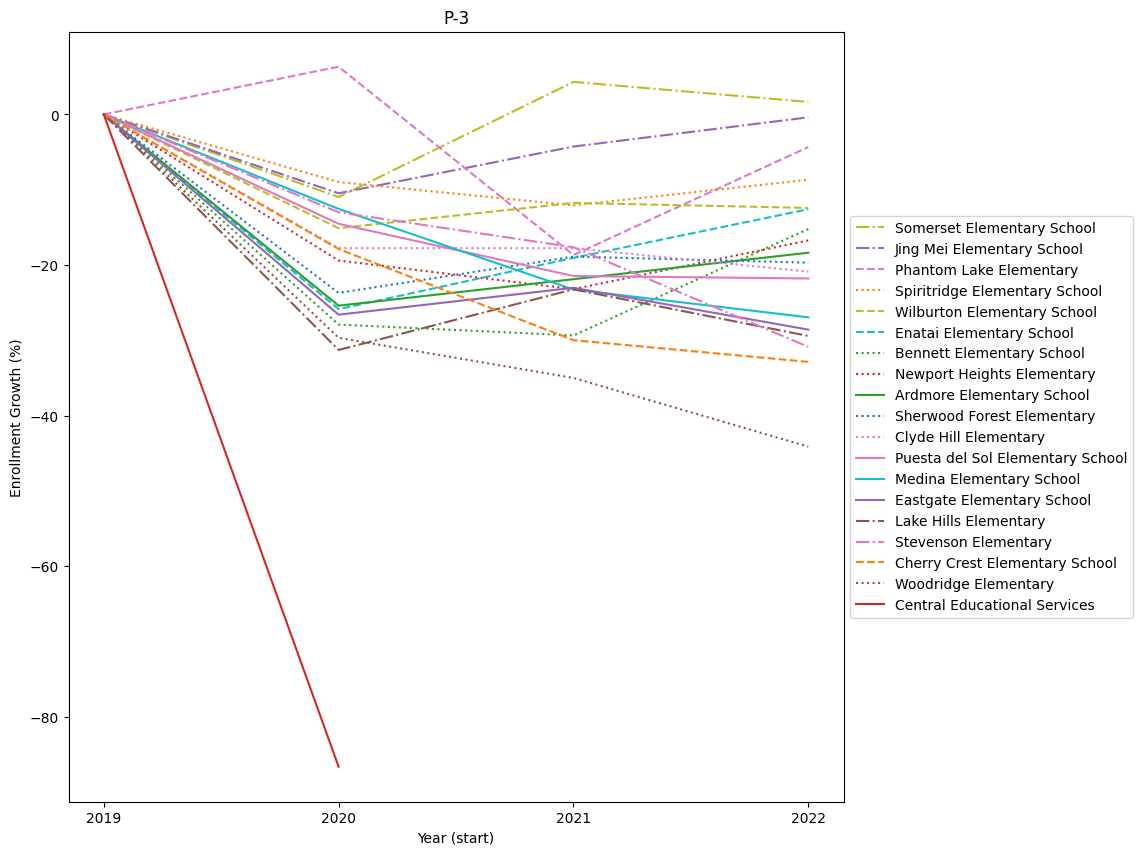

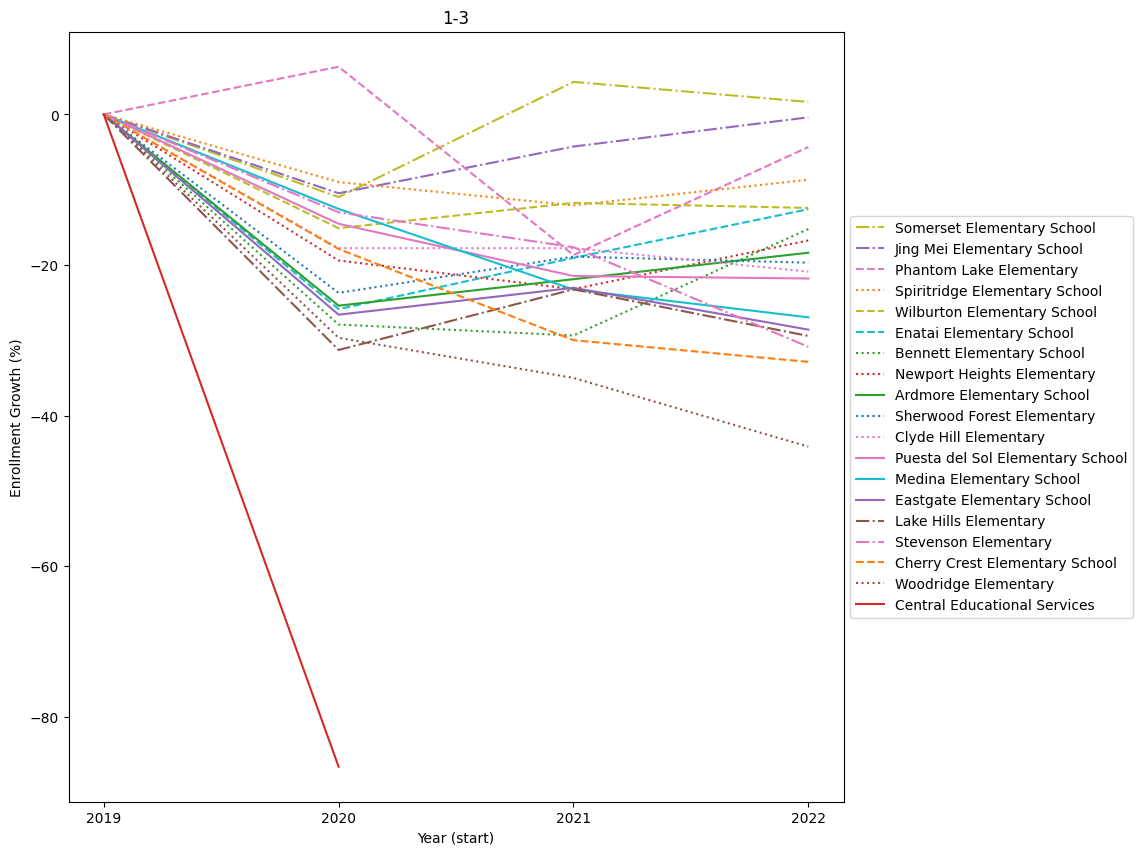

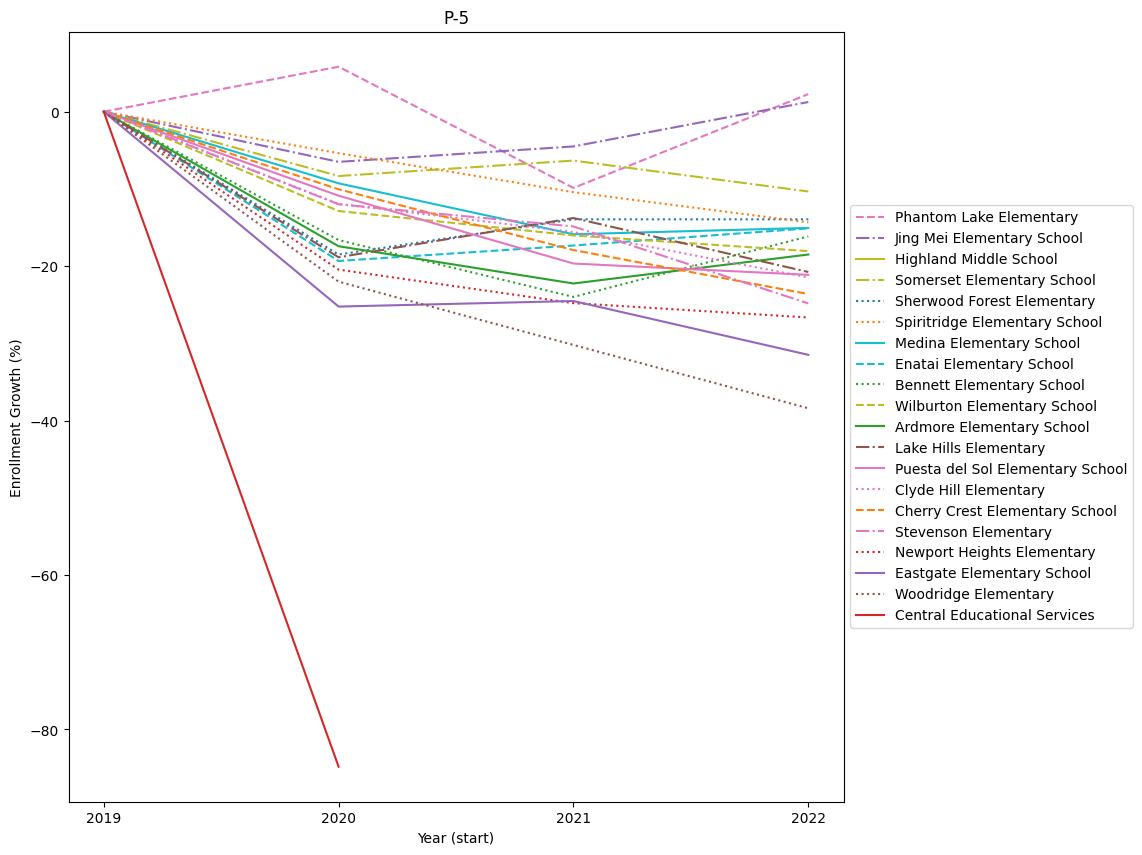

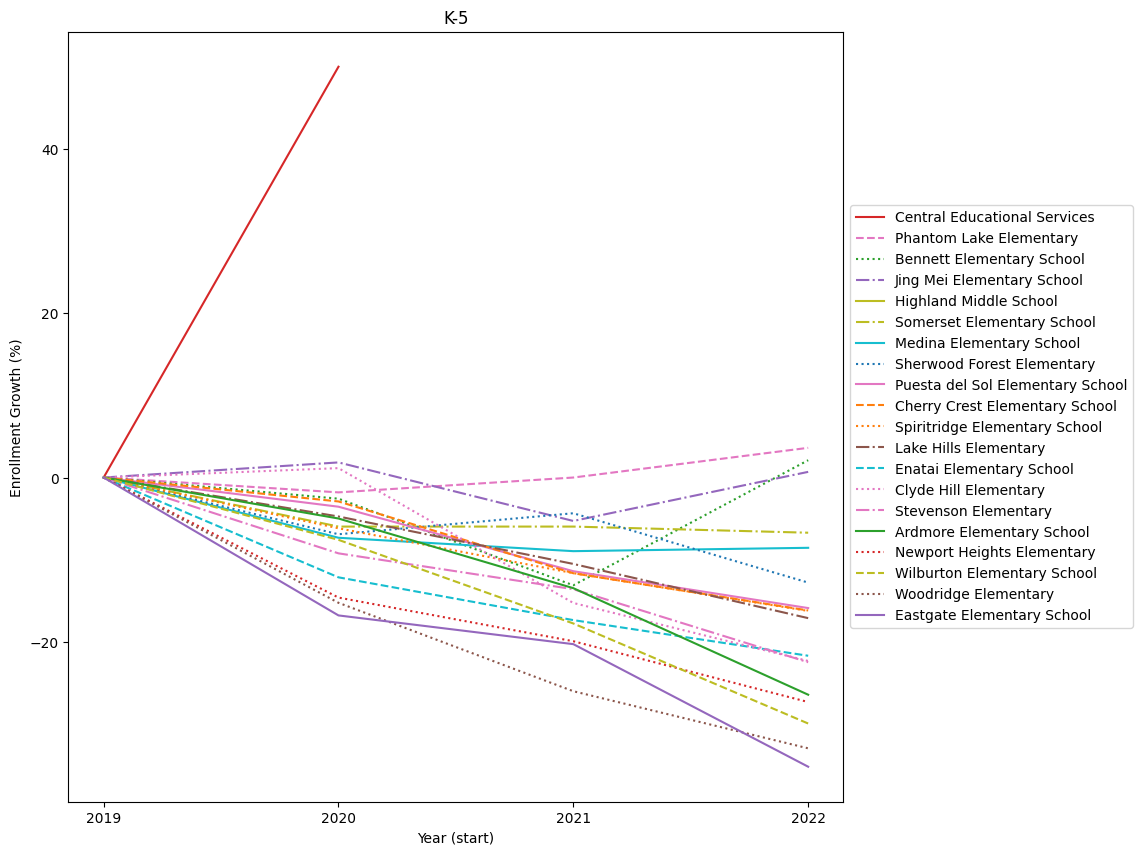

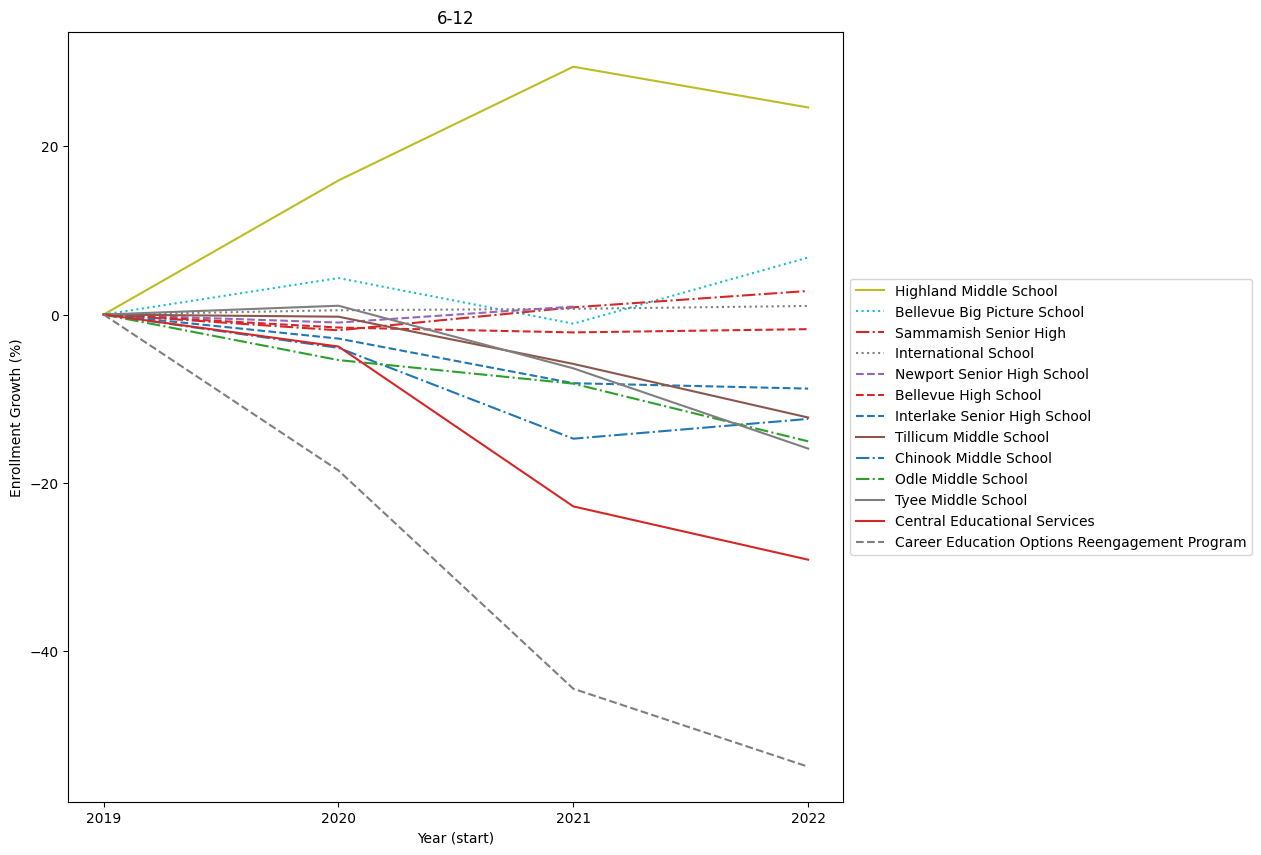

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as _colors  
import itertools, random
import matplotlib.ticker as mticker
import math

styles = list(itertools.product(['solid', 'dashed', 'dashdot', 'dotted'], _colors.TABLEAU_COLORS.values()))
random.Random(0).shuffle(styles)
_school2style = {}
def school2style(school):
    s = _school2style.get(school)
    if s is None:
        s = styles.pop()
        _school2style[school] = s
    return s
[school2style for s in sorted(dAllRegionOfInterest["School Name"].unique())]

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(5)
  
def func(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
# naming the x and y axis


# plt.plot(t1, func(t1), 'bo', t2, func(t2), 'k')
# plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

schools = dAllRegionOfInterest["School Name"].unique()
def genTotals(df):
    for school in schools:
        d = df[df["School Name"]==school]
        d = d[~(d["Total"].isna())]
        if len(d)==0: continue
        years = d["Year"]
        lastYear = years.max()
        d = d.groupby("Year")["Total"].sum()
        sortkey = d.values[-1]
        yield (-sortkey, school), (d.index, d.values)
        
def genGrowth(df):
    for school in schools:
        d = df[df["School Name"]==school]
        d = d[~(d["Total"].isna())]
        if len(d)==0: continue
        
        years = d["Year"]
        lastYear = years.max()
        firstYear = d[d["Year"]==d["Year"]]["Year"].min()
        if math.isnan(firstYear): continue
        firstYearEnrollment = int(d[d["Year"]==firstYear].groupby("Year")["Total"].sum())
        d = d.groupby("Year")["Total"].sum() - firstYearEnrollment        
        sortkey = d.values[-1]
        yield (-sortkey, school), (d.index.values, d.values)

        
def genGrowthPercent(df):
    for school in schools:
        d = df[df["School Name"]==school]
        d = d[~(d["Total"].isna())]
        if len(d)==0: continue
        
        years = d["Year"]
        lastYear = years.max()
        firstYear = d[d["Year"]==d["Year"]]["Year"].min()
        if math.isnan(firstYear): continue
        firstYearEnrollment = int(d[d["Year"]==firstYear].groupby("Year")["Total"].sum())
        d = 100*(d.groupby("Year")["Total"].sum() - firstYearEnrollment) / firstYearEnrollment
        sortkey = d.values[-1]
        yield (-sortkey, school), (d.index.values, d.values)

        
def plot(genFunc, year, selectyears, title, xlabel, ylabel):
        f = plt.figure()
        f.set_figwidth(10)
        f.set_figheight(10)

        df = dAllRegionOfInterest
        df = df[df["Year"]>=year]
        df = df[df["Grade"].isin(selectyears)]        
        for i, ((_sum, school), (x,y)) in enumerate(sorted(genFunc(df), key=lambda x:x[0][0])):
           linestyle, color = school2style(school)
           plt.plot(x, y, linestyle=linestyle, color=color, label=school)

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

plotYearsParams = [ 
        ('P-3', ["P"]+[str(s) for s in range(1,4)]),
        ('1-3', ["P"]+[str(s) for s in range(1,4)]),
        ('P-5', ["P"]+[str(s) for s in range(1,6)]),
        ('K-5', ["K"]+[str(s) for s in range(1,6)]),
        ('6-12', [str(s) for s in range(6,13)]),
    ]

# Plot Enrollment Growth as %
for year in [2014, 2019]:
    print(f"YEAR > {year} -------------------------")
    for title, selectyears in plotYearsParams:
        # Plot Enrollment Growth
        plot(genGrowthPercent, year, selectyears, title=title, xlabel='Year (start)', ylabel='Enrollment Growth (%)')

YEAR > 2014 -------------------------


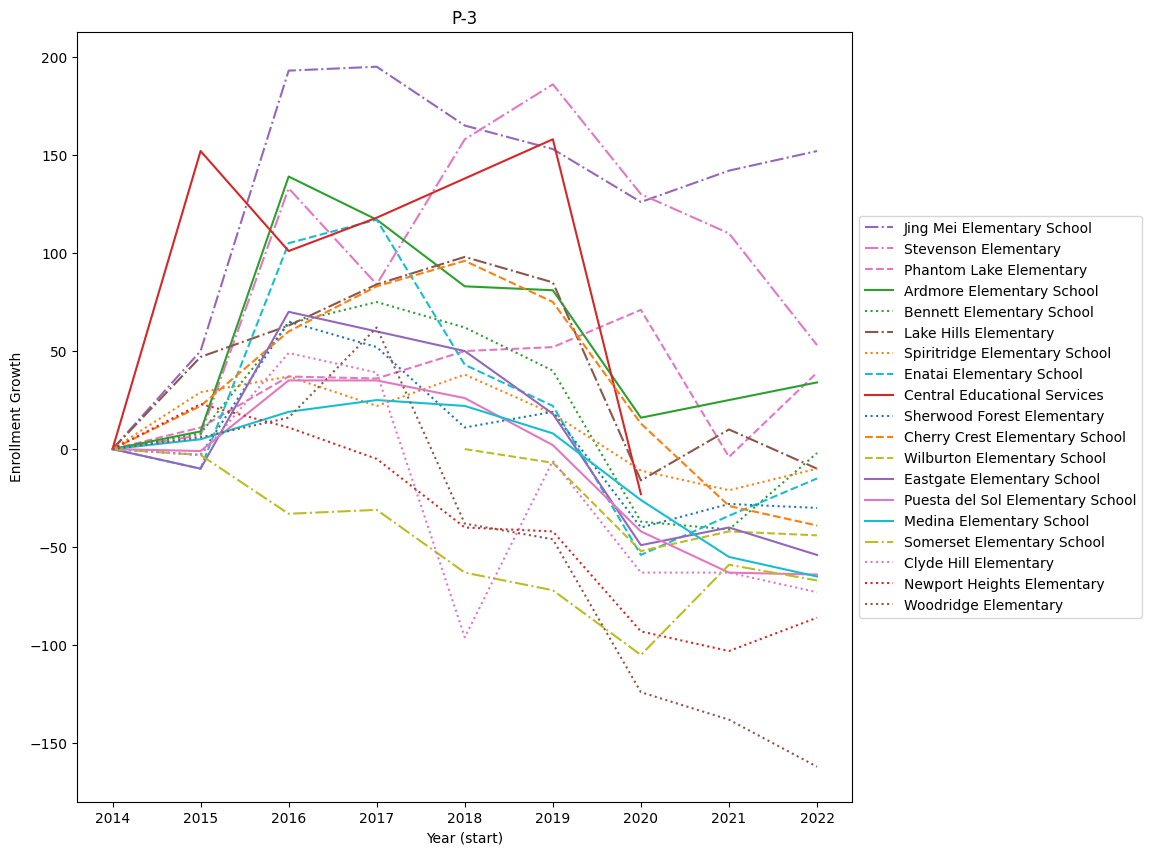

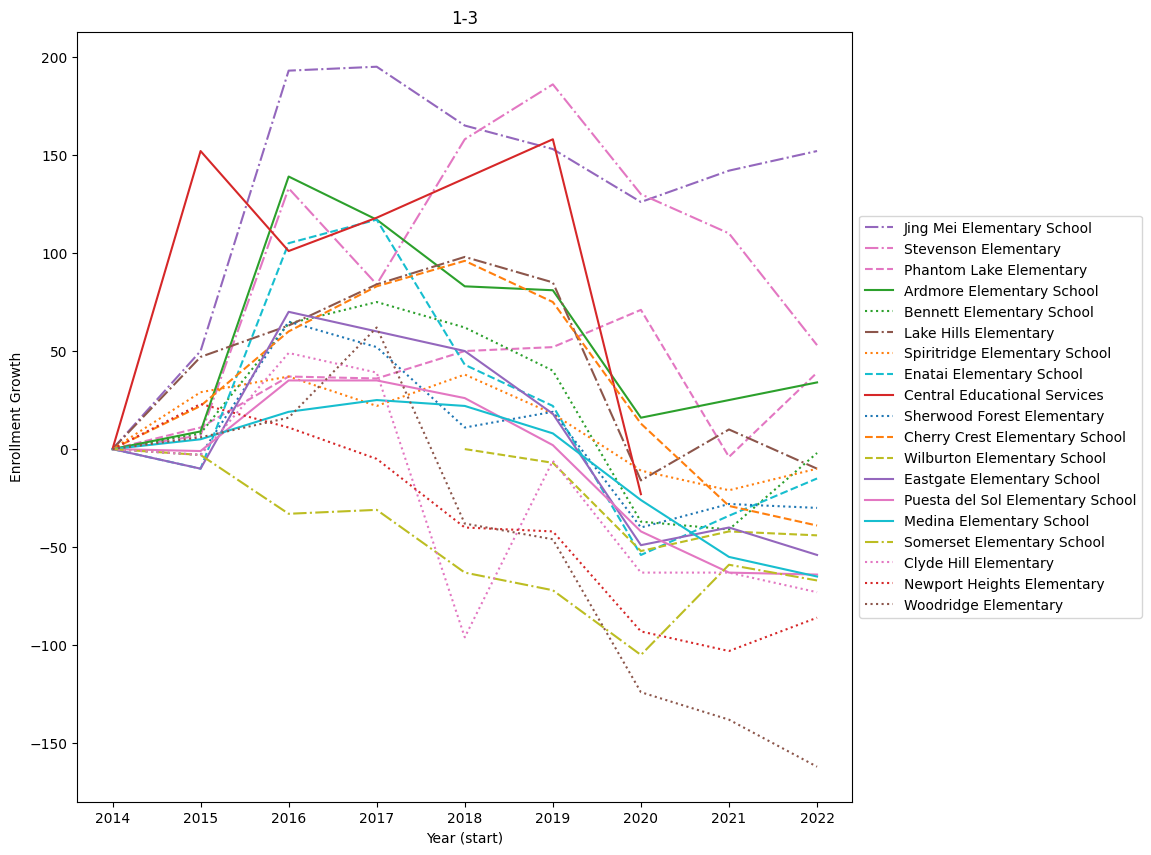

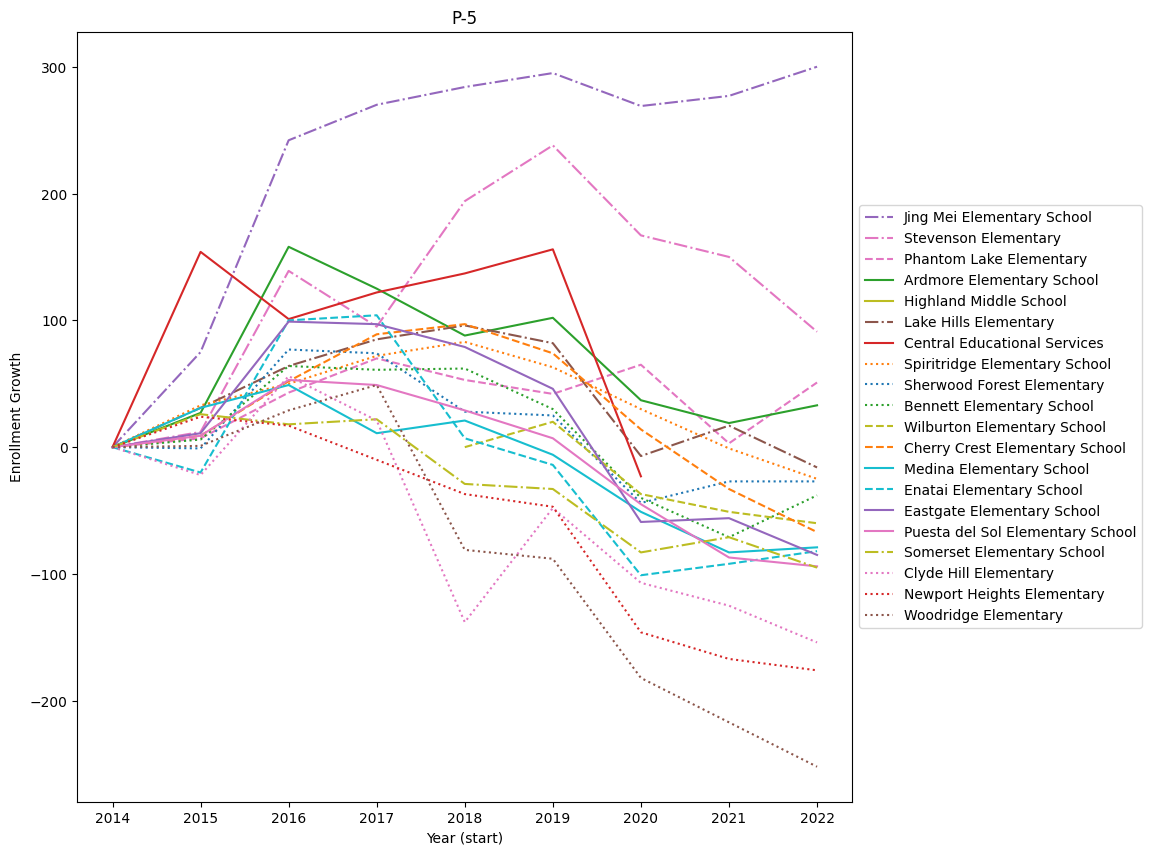

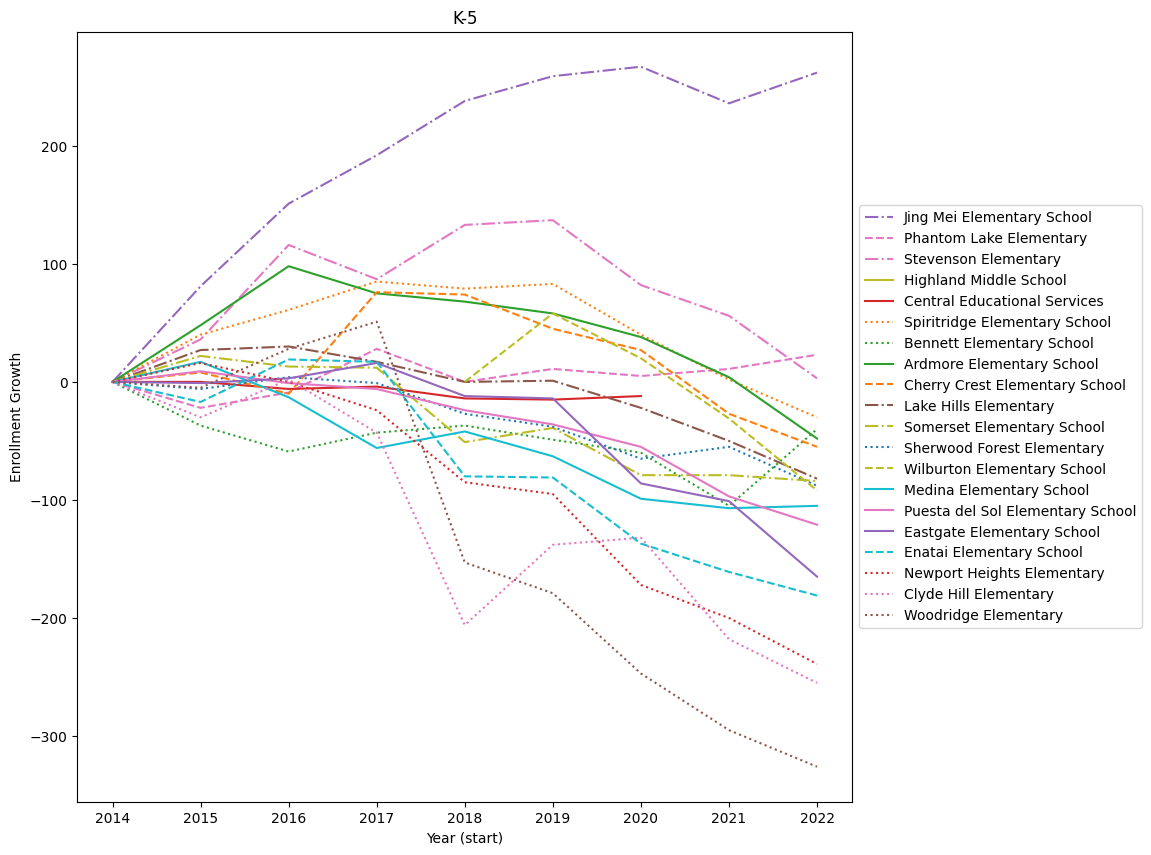

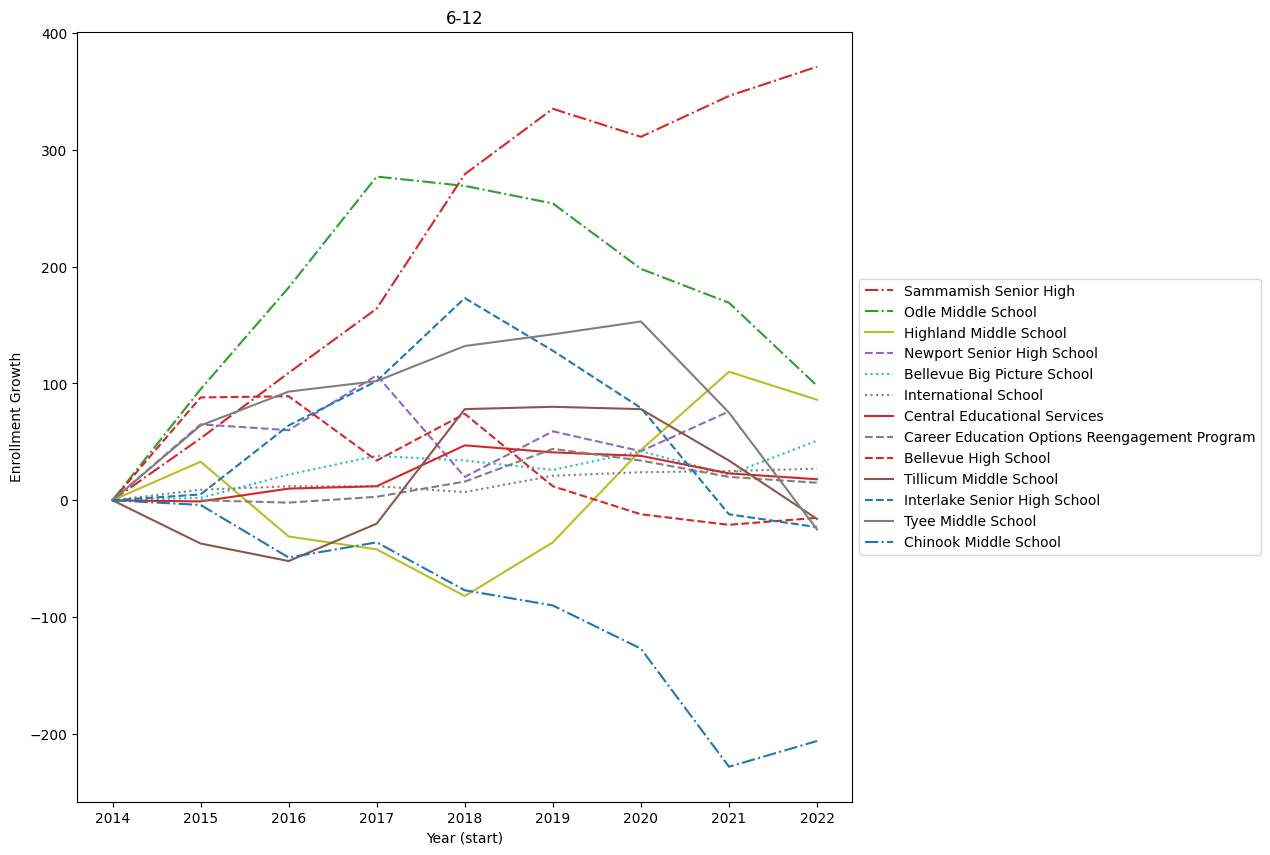

YEAR > 2019 -------------------------


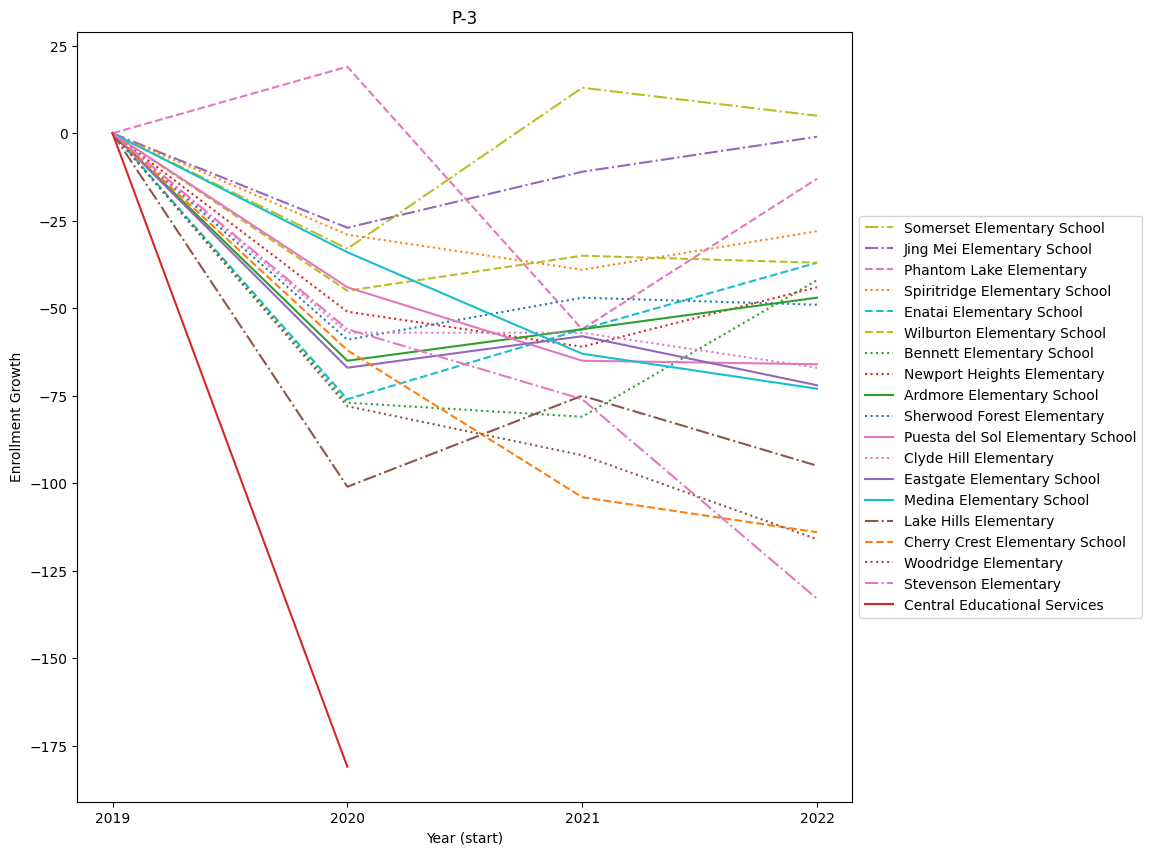

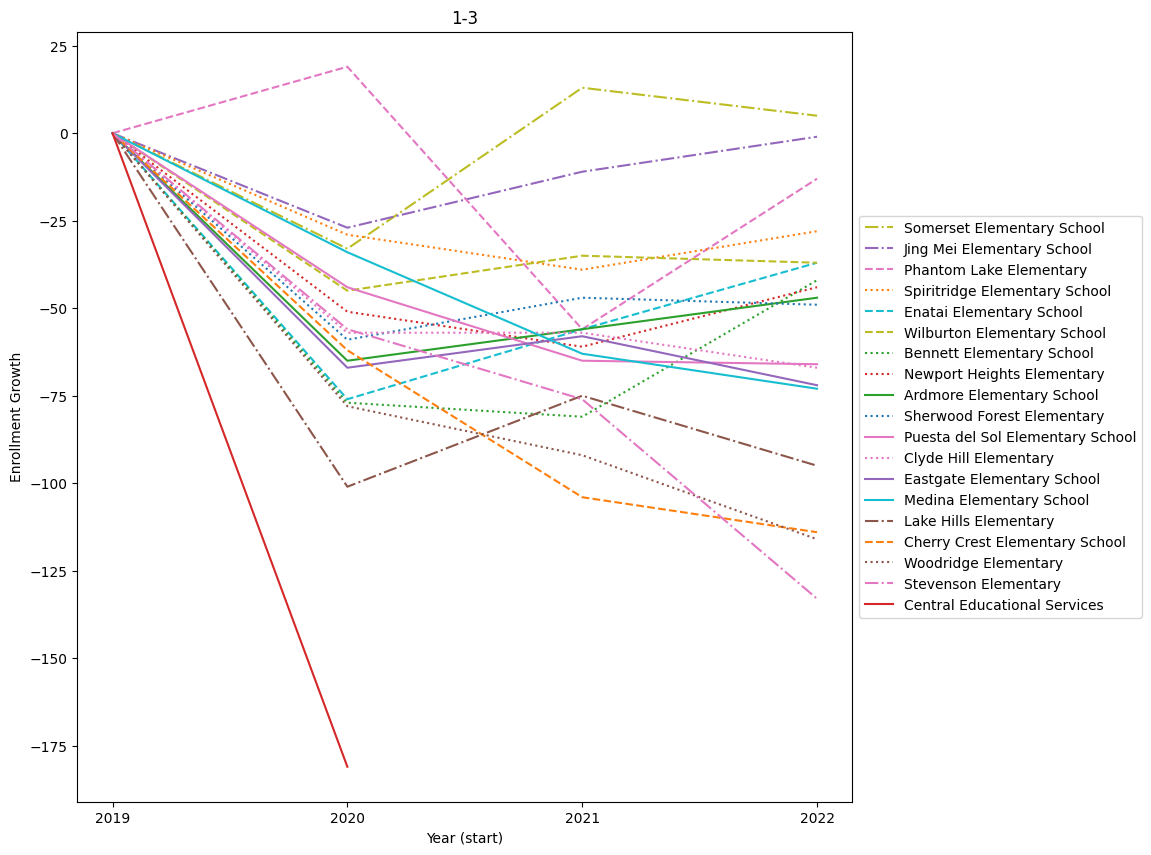

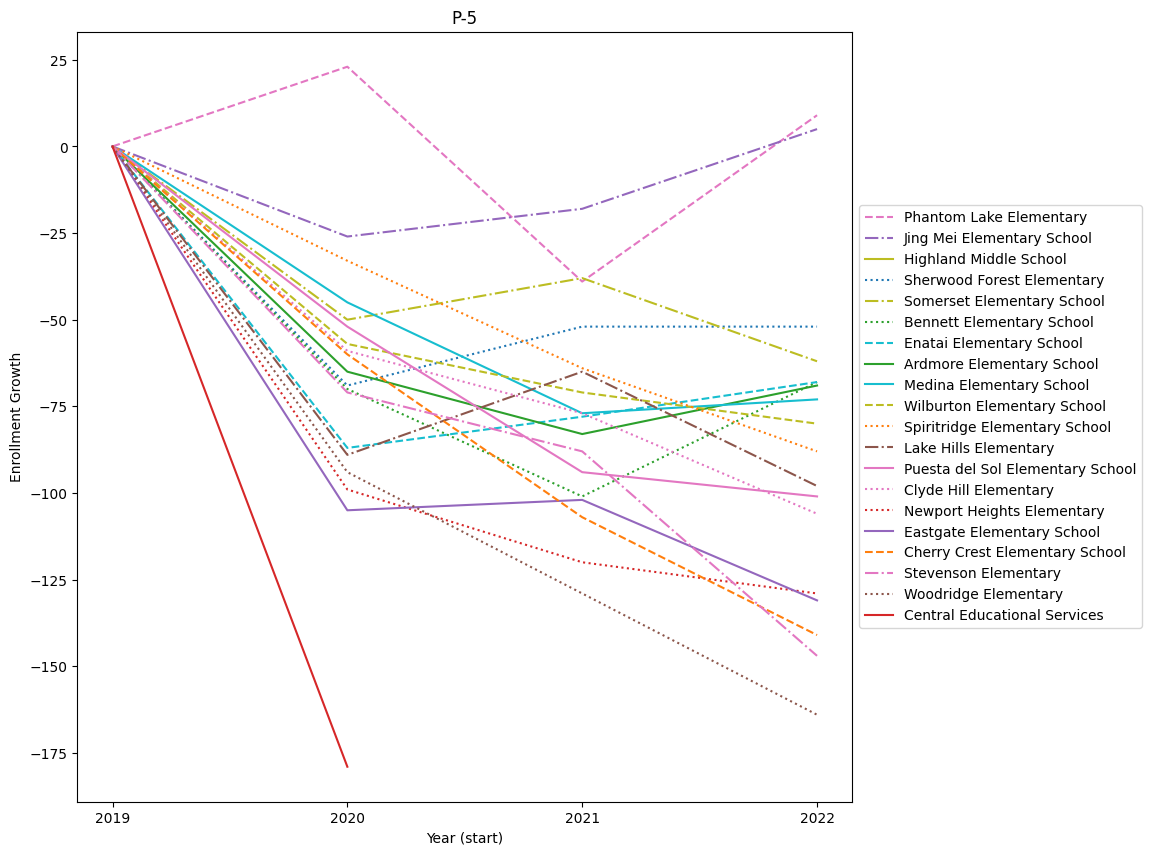

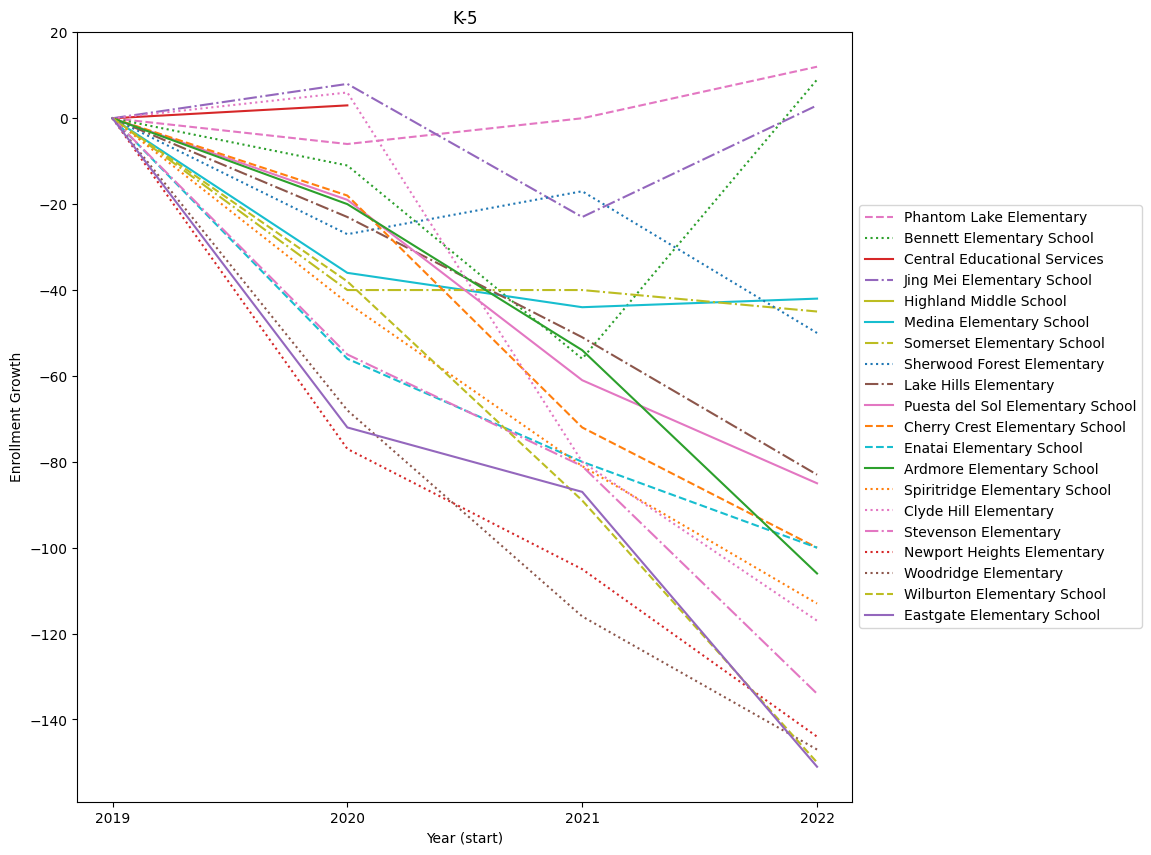

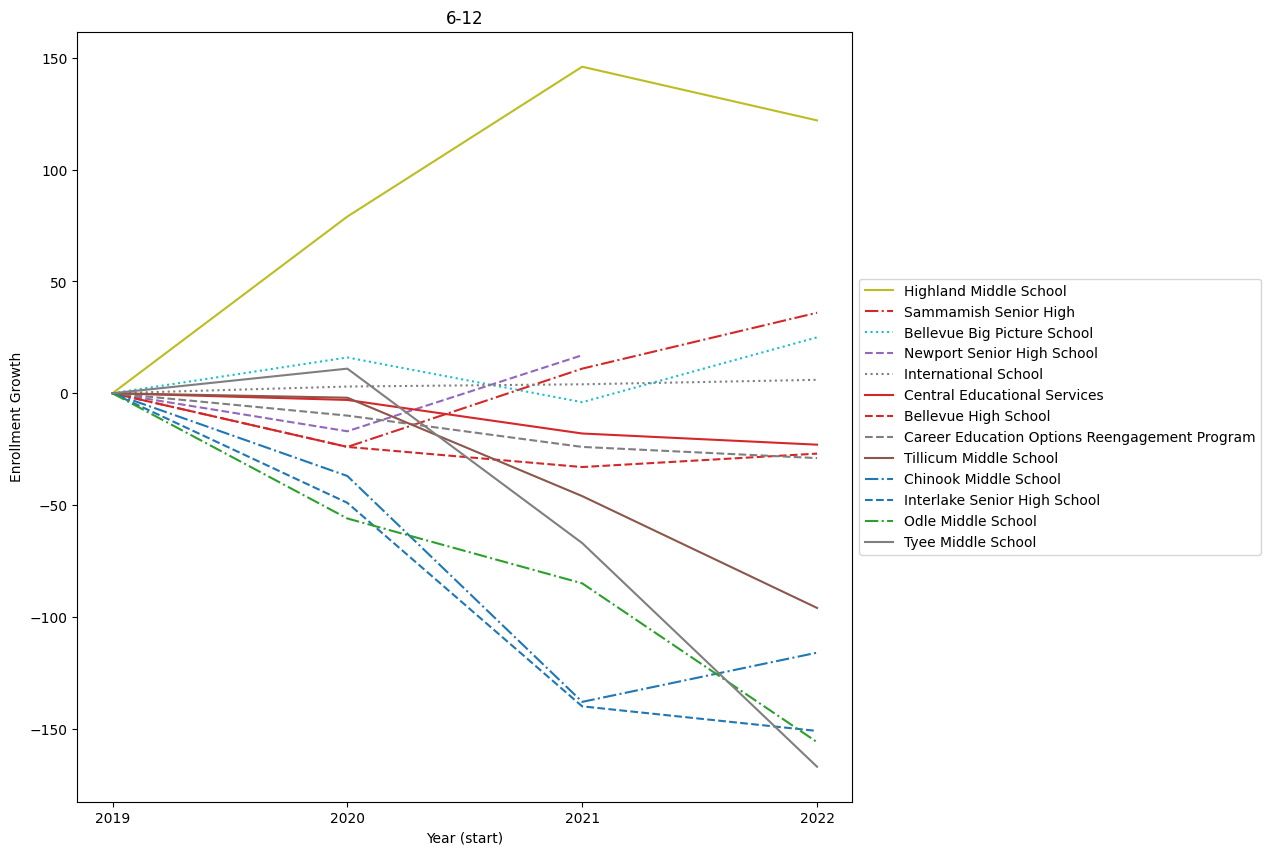

In [6]:
# Plot Enrollment Growth
for year in [2014, 2019]:
    print(f"YEAR > {year} -------------------------")
    for title, selectyears in plotYearsParams:
        plot(genGrowth, year, selectyears, title=title, xlabel='Year (start)', ylabel='Enrollment Growth')

YEAR > 2014 -------------------------


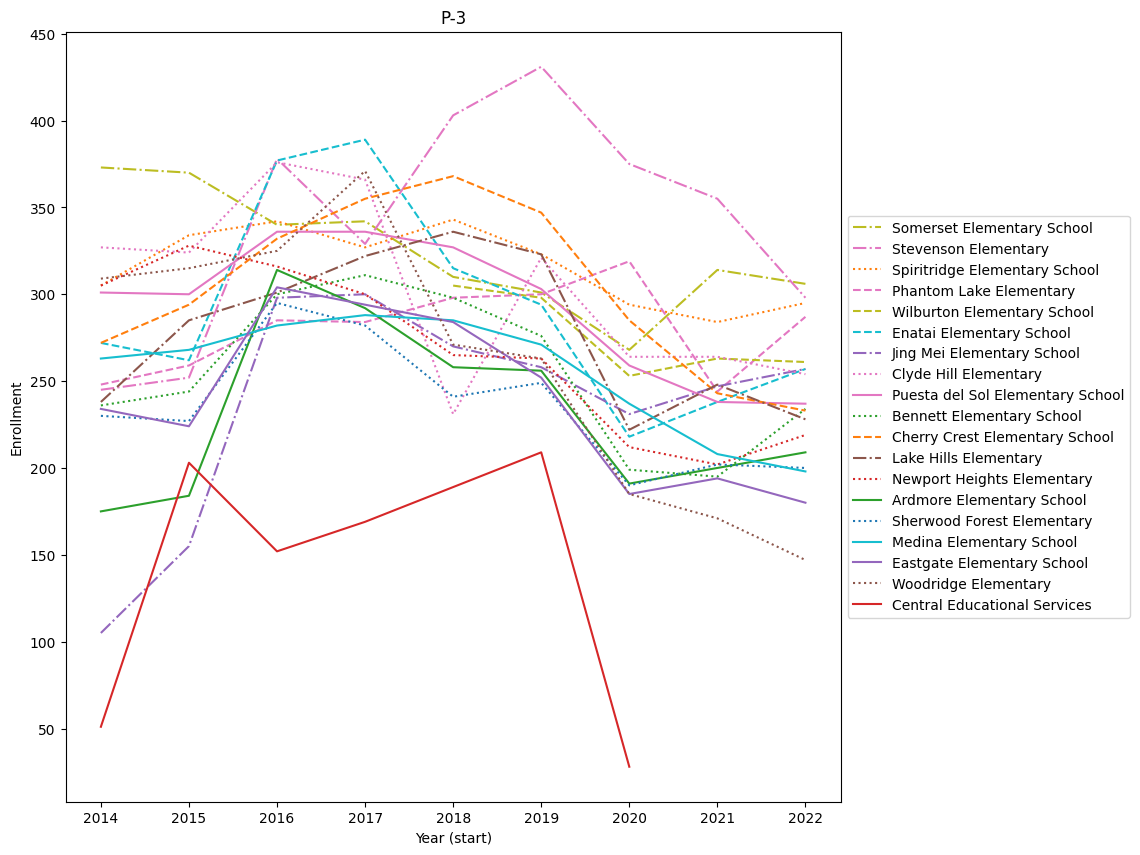

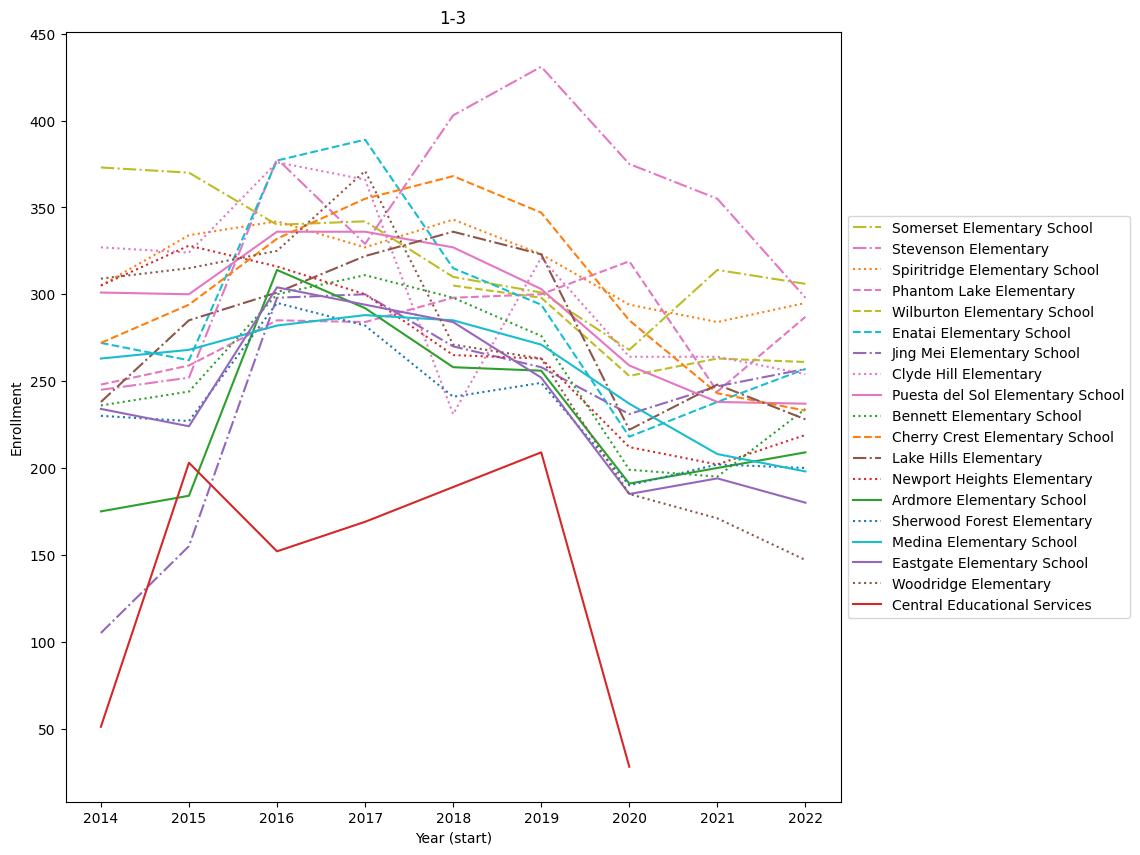

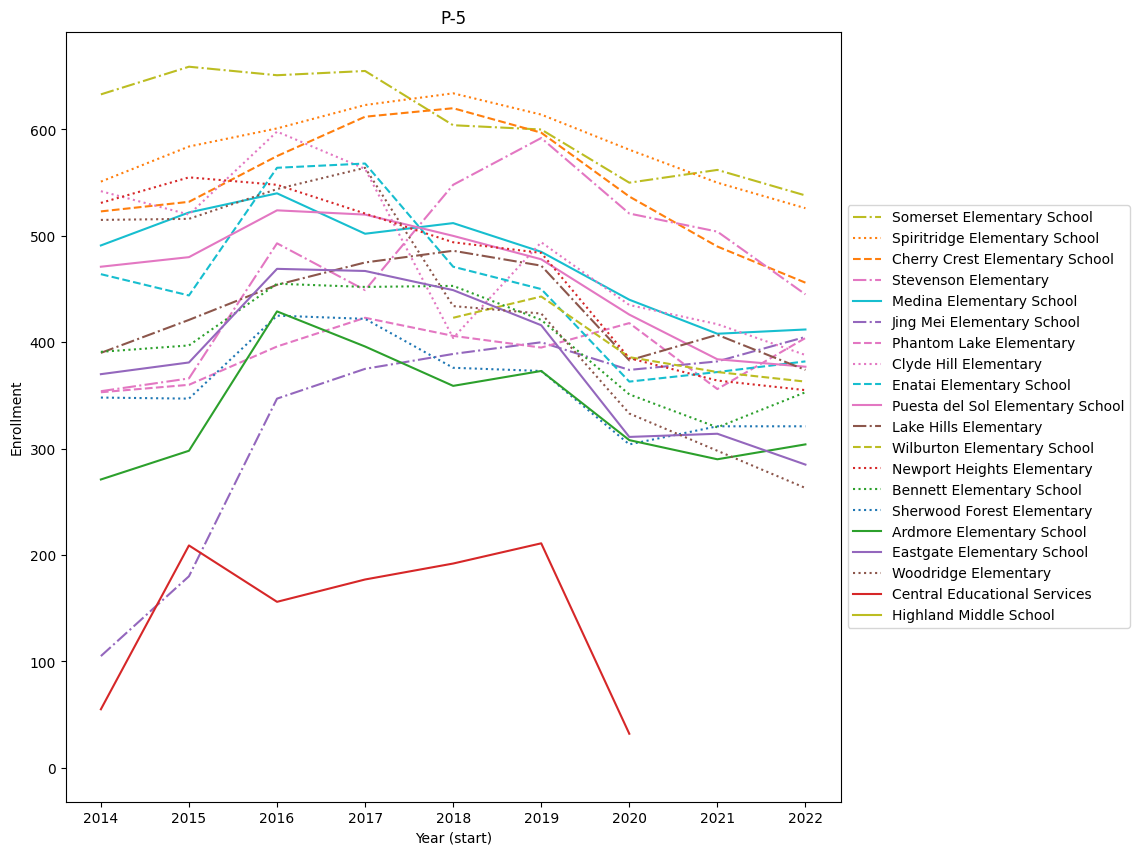

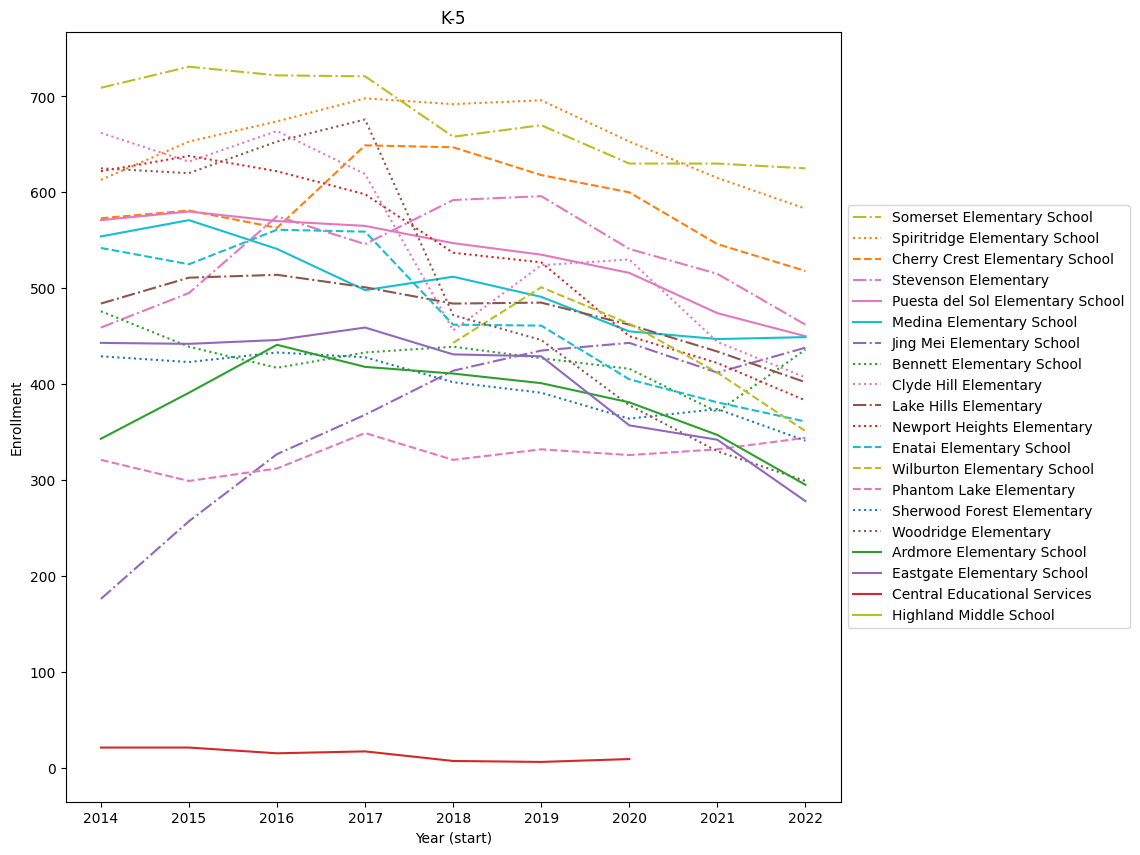

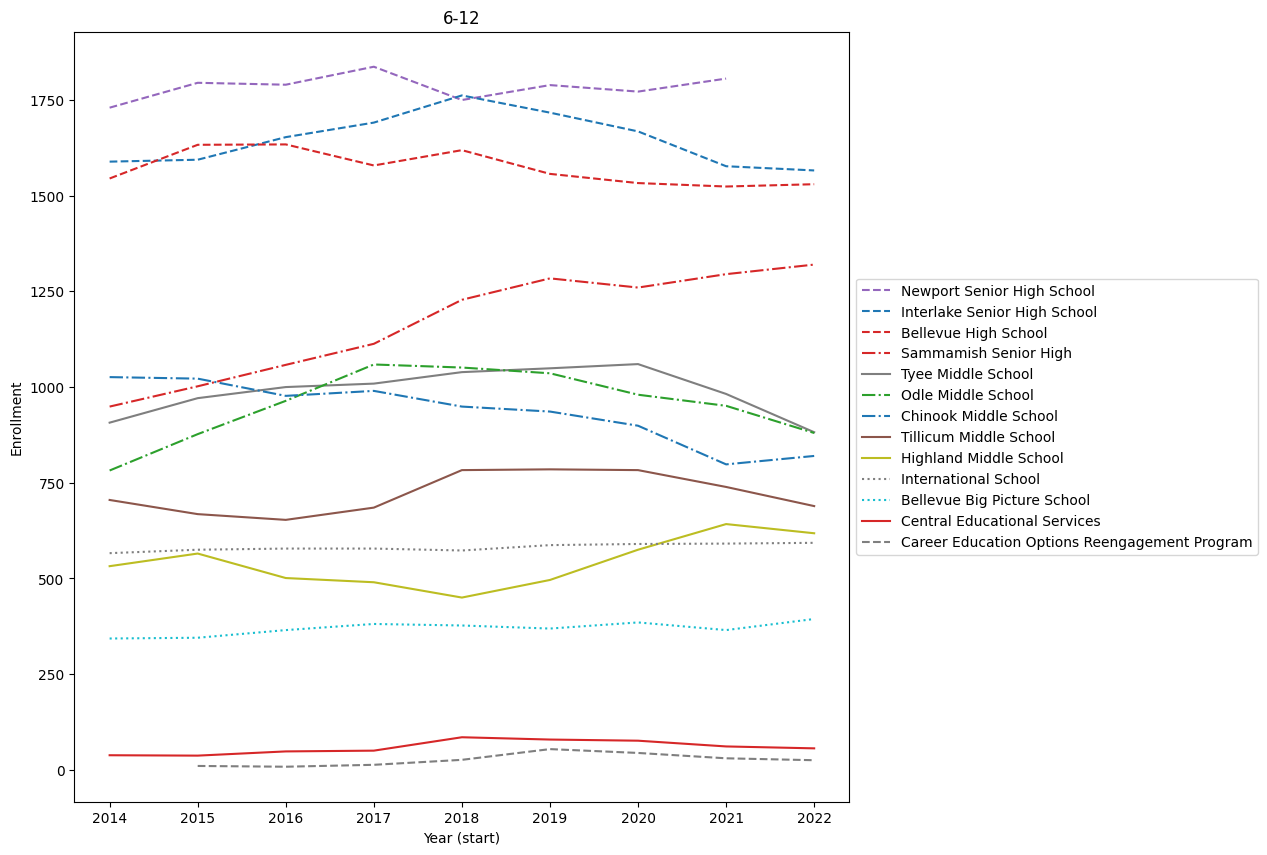

YEAR > 2019 -------------------------


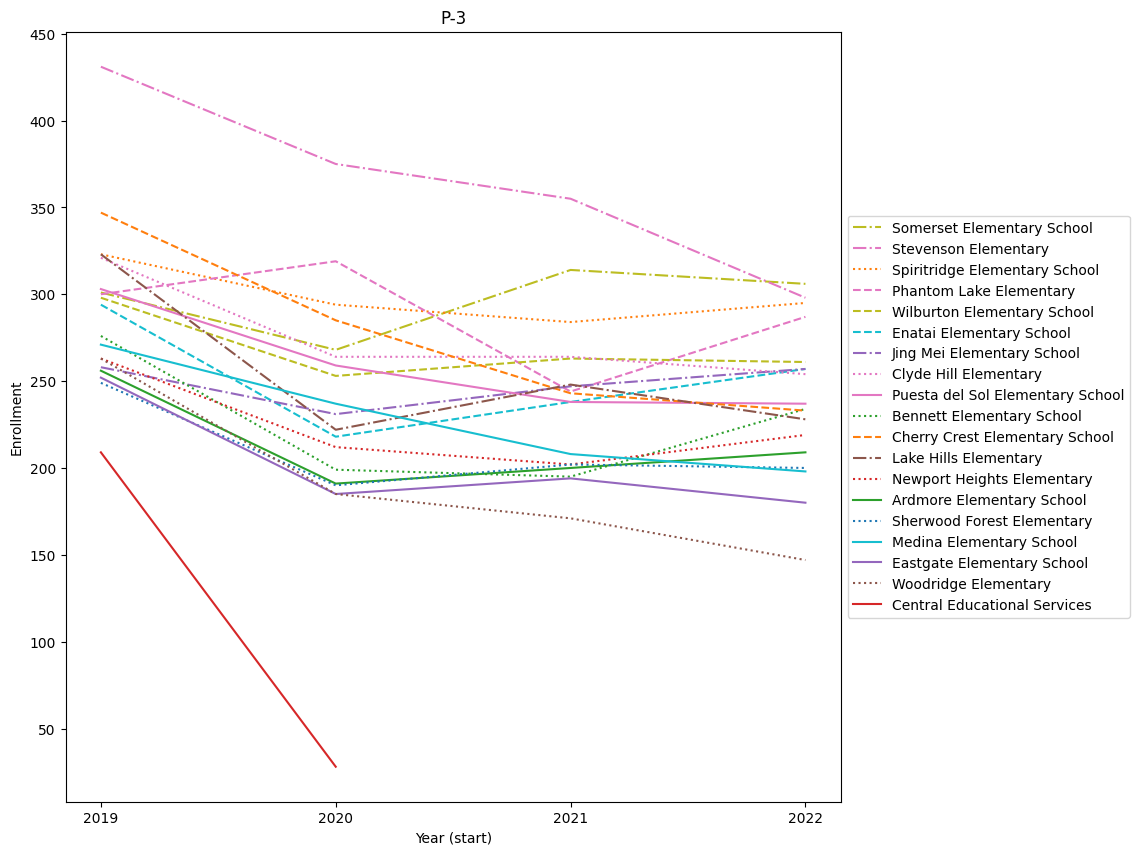

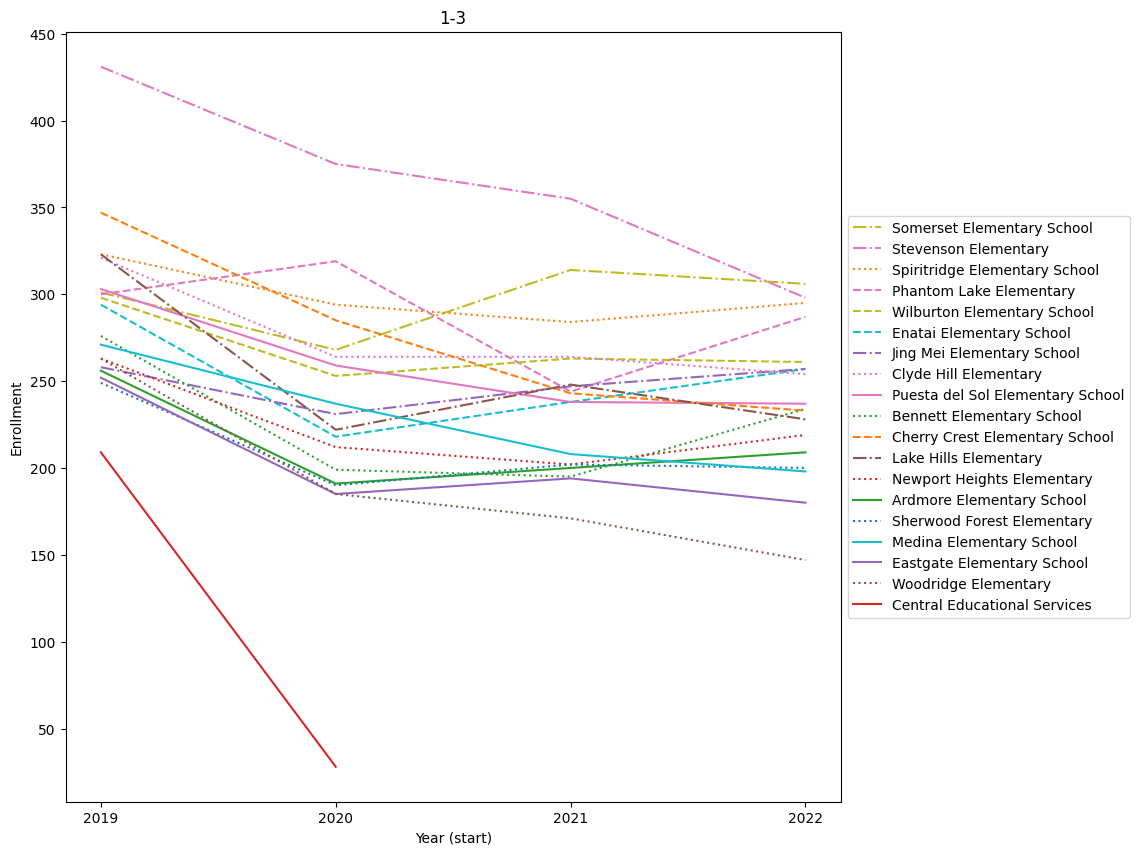

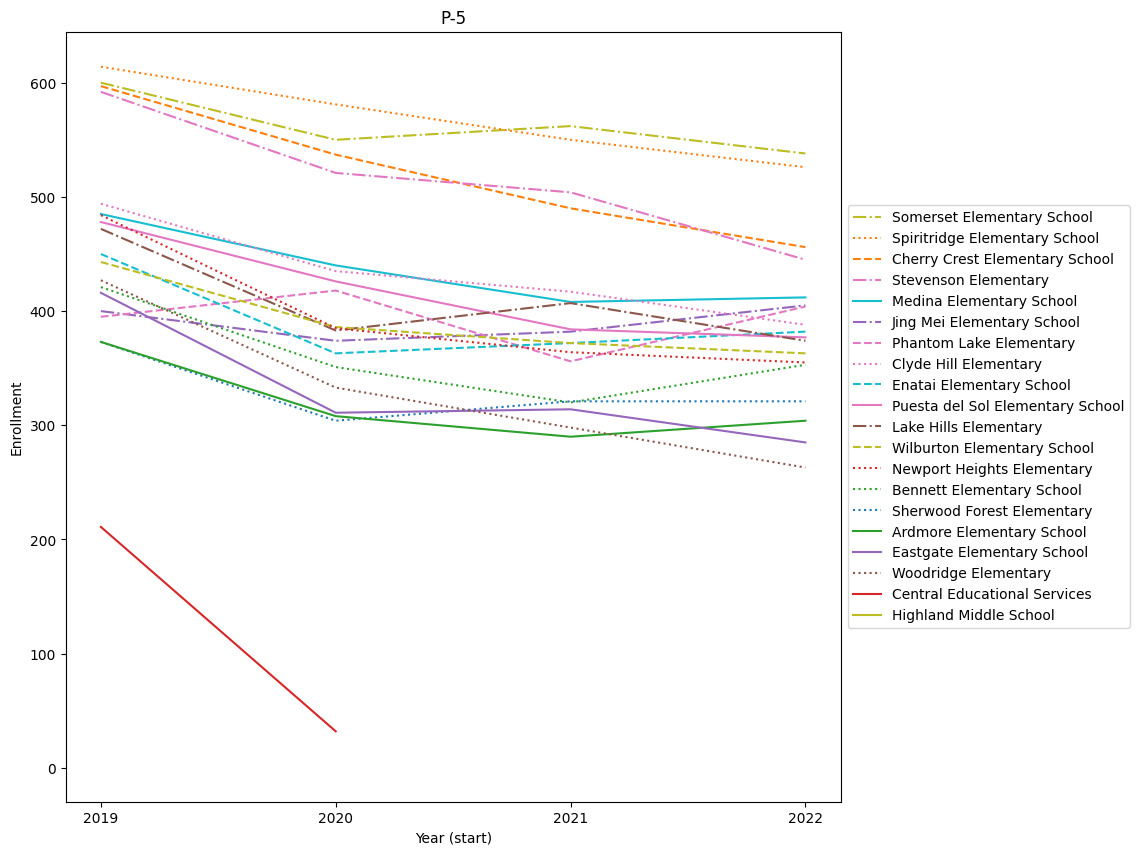

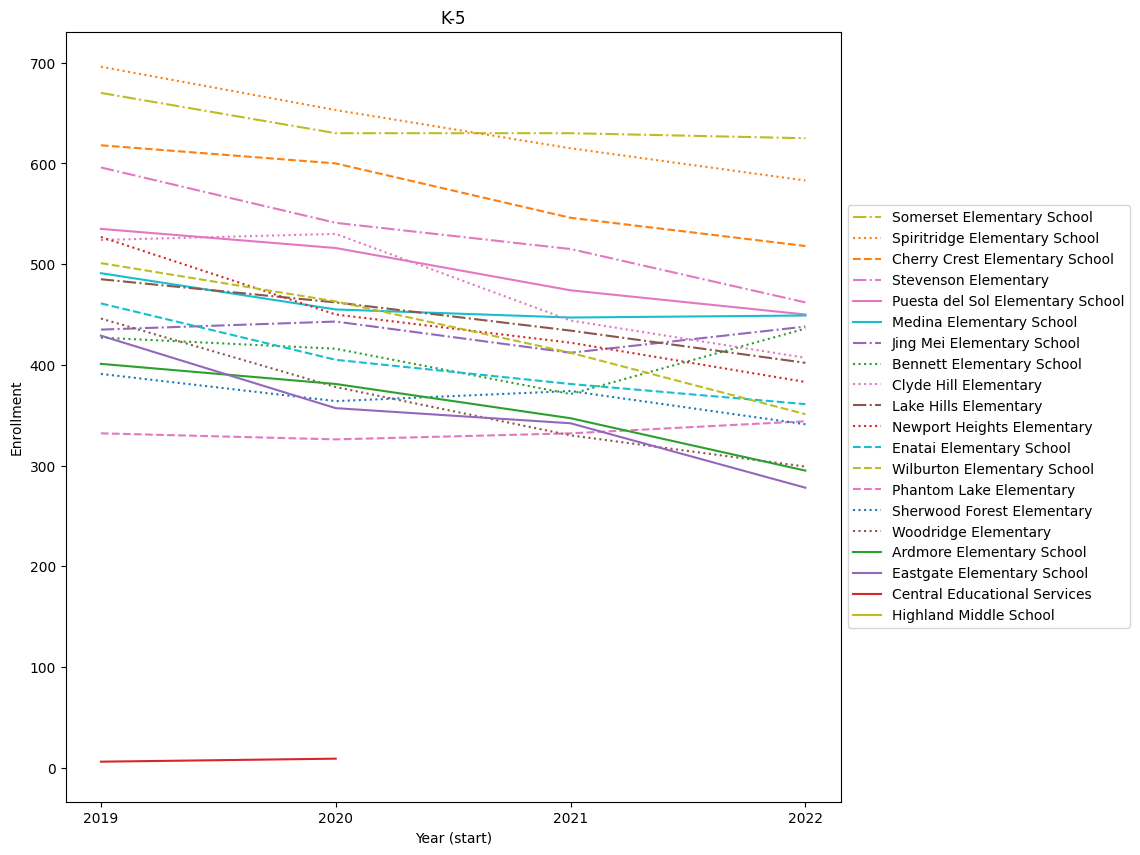

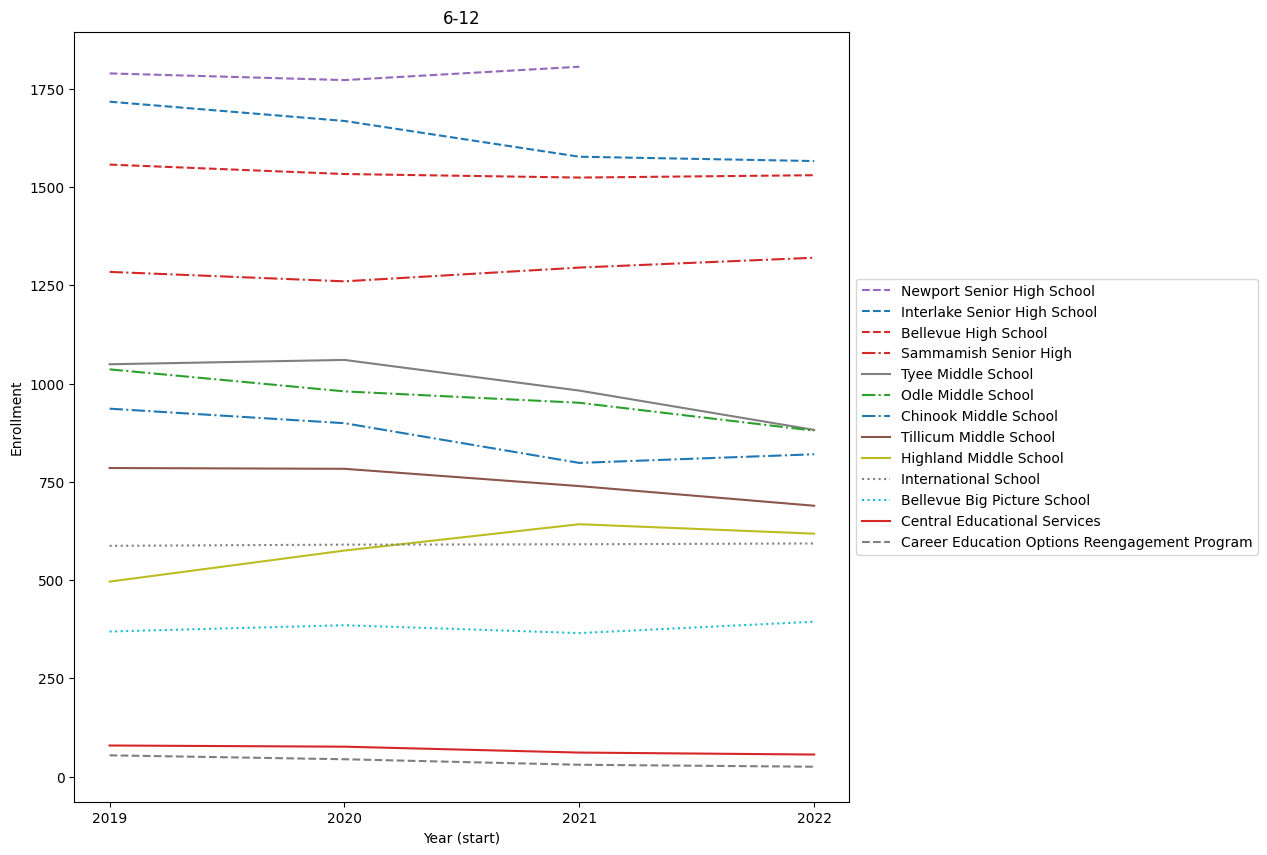

In [7]:
# Plot raw enrollment totals
for year in [2014, 2019]:
    print(f"YEAR > {year} -------------------------")
    for title, selectyears in plotYearsParams:
        # Plot Enrollment
        plot(genTotals, year, selectyears, title=title, xlabel='Year (start)', ylabel='Enrollment')

In [8]:
def genGrowthPercentTable(df):
    d = d[~(d["Total"].isna())]

    years = d["Year"]
    lastYear = years.max()
    firstYear = d[d["Year"]==d["Year"]]["Year"].min()
    firstYearEnrollment = int(d[d["Year"]==firstYear].groupby("Year")["Total"].sum())
    d = 100*(d.groupby("Year")["Total"].sum() / firstYearEnrollment)        
    sortkey = d.values[-1]
    return d

gradesTitle = "G"

for baselineYear in [2019, 2014]:
    print(f"YEAR, >={baselineYear} -------------------------")
    for gradesTitle, selectyears in plotYearsParams:
        
        df = dAllRegionOfInterest
        df = df[df["Year"]>=baselineYear]
        df = df[df["Grade"].isin(selectyears)]        
        # for i, ((_sum, school), (x,y)) in enumerate(sorted(genGrowthPercentTable(df), key=lambda x:x[0][0])):
        firstYear = df[df["Year"]==df["Year"]]["Year"].min()
        # baselineYear = firstYear

        firstYearEnrollment = int(df[df["Year"]==baselineYear].groupby("Year")["Total"].sum())
        firstYearEnrollment
        totals = df.groupby("Year")["Total"].sum().to_frame()
        totalName = f"'Grade {gradesTitle}' public enrollment, Δ since {baselineYear}"
        totals[totalName] = totals["Total"] - firstYearEnrollment
        totals[f"%change"] = 100*(totals[totalName] / firstYearEnrollment)
        display(totals)

YEAR, >=2019 -------------------------


Total  'Grade P-3' public enrollment, Δ since 2019    %change
Year                                                               
2019   5538                                            0   0.000000
2020   4415                                        -1123 -20.278079
2021   4310                                        -1228 -22.174070
2022   4300                                        -1238 -22.354641

Total  'Grade 1-3' public enrollment, Δ since 2019    %change
Year                                                               
2019   5538                                            0   0.000000
2020   4415                                        -1123 -20.278079
2021   4310                                        -1228 -22.174070
2022   4300                                        -1238 -22.354641

Total  'Grade P-5' public enrollment, Δ since 2019    %change
Year                                                               
2019   8725                                            0   0.000000
2020   7439                                        -1286 -14.739255
2021   7111                                        -1614 -18.498567
2022   6951                                        -1774 -20.332378

Total  'Grade K-5' public enrollment, Δ since 2019    %change
Year                                                               
2019   8971                                            0   0.000000
2020   8380                                         -591  -6.587894
2021   7828                                        -1143 -12.741055
2022   7422                                        -1549 -17.266748

Total  'Grade 6-12' public enrollment, Δ since 2019    %change
Year                                                                
2019  11738                                             0   0.000000
2020  11625                                          -113  -0.962685
2021  11361                                          -377  -3.211791
2022   9373                                         -2365 -20.148236

YEAR, >=2014 -------------------------


Total  'Grade P-3' public enrollment, Δ since 2014    %change
Year                                                               
2014   4489                                            0   0.000000
2015   4828                                          339   7.551793
2016   5653                                         1164  25.930051
2017   5657                                         1168  26.019158
2018   5597                                         1108  24.682557
2019   5538                                         1049  23.368233
2020   4415                                          -74  -1.648474
2021   4310                                         -179  -3.987525
2022   4300                                         -189  -4.210292

Total  'Grade 1-3' public enrollment, Δ since 2014    %change
Year                                                               
2014   4489                                            0   0.000000
2015   4828                                          339   7.551793
2016   5653                                         1164  25.930051
2017   5657                                         1168  26.019158
2018   5597                                         1108  24.682557
2019   5538                                         1049  23.368233
2020   4415                                          -74  -1.648474
2021   4310                                         -179  -3.987525
2022   4300                                         -189  -4.210292

Total  'Grade P-5' public enrollment, Δ since 2014    %change
Year                                                               
2014   7358                                            0   0.000000
2015   7771                                          413   5.612938
2016   8769                                         1411  19.176407
2017   8764                                         1406  19.108453
2018   8754                                         1396  18.972547
2019   8725                                         1367  18.578418
2020   7439                                           81   1.100843
2021   7111                                         -247  -3.356890
2022   6951                                         -407  -5.531394

Total  'Grade K-5' public enrollment, Δ since 2014    %change
Year                                                               
2014   8623                                            0   0.000000
2015   8809                                          186   2.157022
2016   9050                                          427   4.951873
2017   9102                                          479   5.554911
2018   8927                                          304   3.525455
2019   8971                                          348   4.035718
2020   8380                                         -243  -2.818045
2021   7828                                         -795  -9.219529
2022   7422                                        -1201 -13.927867

Total  'Grade 6-12' public enrollment, Δ since 2014    %change
Year                                                                
2014  10712                                             0   0.000000
2015  11094                                           382   3.566094
2016  11229                                           517   4.826363
2017  11475                                           763   7.122853
2018  11692                                           980   9.148618
2019  11738                                          1026   9.578043
2020  11625                                           913   8.523152
2021  11361                                           649   6.058626
2022   9373                                         -1339 -12.500000